In [1]:
# Find conda environment
# /home/ahnaf/py3_env/pysyft381
# !echo $CONDA_PREFIX

import os
import matplotlib.pyplot as plt
import pickle, time
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";

#The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="1"
from data_utils import dataset_select, DataSubset  # Returns the train and test sets for the chosen dataset; dataset_select and class DataSubset
from data_dist import * # (Returns the dictionary of nodes/data partitions for both iid and nidd) )
from DNN import * # (Returns Network, client update, aggregate)
from d2denvironment import *  #(returns cluster_set, graph, Laplacian and Eigenvalues)
from train_round import *

In [ ]:
# Step 1: Define parameters for the environment, dataset and dataset distribution
num_epochs = 2
num_rounds = 50

dataset = 'cifar'
if dataset == 'mnist' or dataset == 'cifar': # Num labels will depend on the class in question
    num_labels = 10
if dataset == 'mnist':
    in_ch = 1
elif dataset == 'cifar':
    in_ch = 3
     
num_nodes = 30
shard_size = 50 #shard size for Niid distribution
modes = ['d2d_clus', 'd2d', 'centr_fed', 'sgd'] # 'd2d'
clusters = [5, int(num_nodes/2), 1, None]

#### Step 2: Import Dataset partitioned into train and testsets
# Call data_select from data_utils
traindata, testdata = dataset_select(dataset)

#### Step 3: Divide data among the nodes according to the distribution IID or non-IID
# Call data_iid/ data_noniid from data_dist
# partitions = data_iid(train, num_nodes)
# train_dist = data_iid(traindata, num_nodes)
train_dist = data_noniid(traindata, num_nodes, shard_size)
test_dist = data_iid(testdata, num_nodes)

### Step 4: Instantiate DNN models (same weight or different weights) at all nodes. Choose random cluster, update local model and aggregate in the cluster
### Step5: Call federate function to start training
model_collection, test_acc, trg_loss, test_loss, divergence_dict = federate(modes, num_rounds, num_epochs, num_nodes, clusters, num_labels, in_ch,
                                 traindata, train_dist, testdata, test_dist)

# num_cycles, num_epochs, num_nodes, cluster_set, num_labels, traindata, traindata_dist, testdata, testdata_dist, wt_init = 'same'
   

Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/2 [00:00<?, ?it/s]/home/ahnaf/Fed_Learn/Divergence/data_utils.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(image), torch.tensor(label)
100%|██████████| 2/2 [00:01<00:00,  1.10it/s]


Local update for all nodes for mode-d2d_clus completed
Average train loss pre-aggregate 1.25
End of round- Entering aggregation
End of round- Entering aggregation
End of round- Entering aggregation
End of round- Entering aggregation
End of round- Entering aggregation
Aggregation for mode d2d_clus completed


  0%|          | 0/2 [00:00<?, ?it/s]

Model_testing completed
Cycle 0 for mode d2d_clus completed


100%|██████████| 2/2 [00:01<00:00,  1.11it/s]


Local update for all nodes for mode-d2d completed
Average train loss pre-aggregate 1.27
End of round- Entering aggregation
End of round- Entering aggregation
End of round- Entering aggregation
End of round- Entering aggregation
End of round- Entering aggregation
End of round- Entering aggregation
End of round- Entering aggregation
End of round- Entering aggregation
End of round- Entering aggregation
End of round- Entering aggregation
End of round- Entering aggregation
End of round- Entering aggregation
End of round- Entering aggregation
End of round- Entering aggregation
End of round- Entering aggregation
Aggregation for mode d2d completed


  0%|          | 0/2 [00:00<?, ?it/s]

Model_testing completed
Cycle 0 for mode d2d completed


100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


Local update for all nodes for mode-centr_fed completed
Average train loss pre-aggregate 1.34
End of round- Entering aggregation
Aggregation for mode centr_fed completed


  0%|          | 0/2 [00:00<?, ?it/s]

Model_testing completed
Cycle 0 for mode centr_fed completed


  0%|          | 0/2 [00:00<?, ?it/s]

SGD Training completed-Moving to calculate Divergence
SGD Divergence concluded


100%|██████████| 2/2 [00:01<00:00,  1.11it/s]


Local update for all nodes for mode-d2d_clus completed
Average train loss pre-aggregate 1.01
End of round- Entering aggregation
Aggregation for mode d2d_clus completed


  0%|          | 0/2 [00:00<?, ?it/s]

Model_testing completed
Cycle 1 for mode d2d_clus completed


100%|██████████| 2/2 [00:01<00:00,  1.11it/s]


Local update for all nodes for mode-d2d completed
Average train loss pre-aggregate 1.05
End of round- Entering aggregation
Aggregation for mode d2d completed


  0%|          | 0/2 [00:00<?, ?it/s]

Model_testing completed
Cycle 1 for mode d2d completed


100%|██████████| 2/2 [00:01<00:00,  1.10it/s]


Local update for all nodes for mode-centr_fed completed
Average train loss pre-aggregate 0.893
End of round- Entering aggregation
Aggregation for mode centr_fed completed


  0%|          | 0/2 [00:00<?, ?it/s]

Model_testing completed
Cycle 1 for mode centr_fed completed


  0%|          | 0/2 [00:00<?, ?it/s]

SGD Training completed-Moving to calculate Divergence
SGD Divergence concluded


100%|██████████| 2/2 [00:01<00:00,  1.09it/s]


Local update for all nodes for mode-d2d_clus completed
Average train loss pre-aggregate 0.709
End of round- Entering aggregation
Aggregation for mode d2d_clus completed


  0%|          | 0/2 [00:00<?, ?it/s]

Model_testing completed
Cycle 2 for mode d2d_clus completed


100%|██████████| 2/2 [00:01<00:00,  1.10it/s]


Local update for all nodes for mode-d2d completed
Average train loss pre-aggregate 0.756
End of round- Entering aggregation
Aggregation for mode d2d completed


  0%|          | 0/2 [00:00<?, ?it/s]

Model_testing completed
Cycle 2 for mode d2d completed


100%|██████████| 2/2 [00:01<00:00,  1.07it/s]


Local update for all nodes for mode-centr_fed completed
Average train loss pre-aggregate 0.752
End of round- Entering aggregation
Aggregation for mode centr_fed completed


  0%|          | 0/2 [00:00<?, ?it/s]

Model_testing completed
Cycle 2 for mode centr_fed completed


  0%|          | 0/2 [00:00<?, ?it/s]

SGD Training completed-Moving to calculate Divergence
SGD Divergence concluded


100%|██████████| 2/2 [00:01<00:00,  1.10it/s]


Local update for all nodes for mode-d2d_clus completed
Average train loss pre-aggregate 0.688
End of round- Entering aggregation
Aggregation for mode d2d_clus completed


  0%|          | 0/2 [00:00<?, ?it/s]

Model_testing completed
Cycle 3 for mode d2d_clus completed


100%|██████████| 2/2 [00:01<00:00,  1.10it/s]


Local update for all nodes for mode-d2d completed
Average train loss pre-aggregate 0.624
End of round- Entering aggregation
Aggregation for mode d2d completed


  0%|          | 0/2 [00:00<?, ?it/s]

Model_testing completed
Cycle 3 for mode d2d completed


100%|██████████| 2/2 [00:01<00:00,  1.09it/s]


Local update for all nodes for mode-centr_fed completed
Average train loss pre-aggregate 0.697
End of round- Entering aggregation
Aggregation for mode centr_fed completed


  0%|          | 0/2 [00:00<?, ?it/s]

Model_testing completed
Cycle 3 for mode centr_fed completed


  0%|          | 0/2 [00:00<?, ?it/s]

SGD Training completed-Moving to calculate Divergence
SGD Divergence concluded


100%|██████████| 2/2 [00:01<00:00,  1.10it/s]


Local update for all nodes for mode-d2d_clus completed
Average train loss pre-aggregate 0.717
End of round- Entering aggregation
Aggregation for mode d2d_clus completed


  0%|          | 0/2 [00:00<?, ?it/s]

Model_testing completed
Cycle 4 for mode d2d_clus completed


100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


Local update for all nodes for mode-d2d completed
Average train loss pre-aggregate 0.636
End of round- Entering aggregation
Aggregation for mode d2d completed


  0%|          | 0/2 [00:00<?, ?it/s]

Model_testing completed
Cycle 4 for mode d2d completed


100%|██████████| 2/2 [00:02<00:00,  1.05s/it]


Local update for all nodes for mode-centr_fed completed
Average train loss pre-aggregate 0.797
End of round- Entering aggregation
Aggregation for mode centr_fed completed


  0%|          | 0/2 [00:00<?, ?it/s]

Model_testing completed
Cycle 4 for mode centr_fed completed


  0%|          | 0/2 [00:00<?, ?it/s]

SGD Training completed-Moving to calculate Divergence
SGD Divergence concluded


100%|██████████| 2/2 [00:01<00:00,  1.10it/s]


Local update for all nodes for mode-d2d_clus completed
Average train loss pre-aggregate 0.641
End of round- Entering aggregation
Aggregation for mode d2d_clus completed


  0%|          | 0/2 [00:00<?, ?it/s]

Model_testing completed
Cycle 5 for mode d2d_clus completed


100%|██████████| 2/2 [00:01<00:00,  1.08it/s]


Local update for all nodes for mode-d2d completed
Average train loss pre-aggregate 0.538
End of round- Entering aggregation
Aggregation for mode d2d completed


  0%|          | 0/2 [00:00<?, ?it/s]

Model_testing completed
Cycle 5 for mode d2d completed


100%|██████████| 2/2 [00:01<00:00,  1.09it/s]


Local update for all nodes for mode-centr_fed completed
Average train loss pre-aggregate 0.582
End of round- Entering aggregation
Aggregation for mode centr_fed completed


  0%|          | 0/2 [00:00<?, ?it/s]

Model_testing completed
Cycle 5 for mode centr_fed completed


  0%|          | 0/2 [00:00<?, ?it/s]

SGD Training completed-Moving to calculate Divergence
SGD Divergence concluded


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
# Remove nodes not part of any cluster
nodes_list= list(range(num_nodes))
exclude = []
for node in nodes_list:
    if any(node in cluster_list for cluster_list in cs):
        continue
    else:
        exclude.append(node)
final_nodes = copy.deepcopy(nodes_list)
for absent_nodes in exclude:
    final_nodes.remove(absent_nodes)


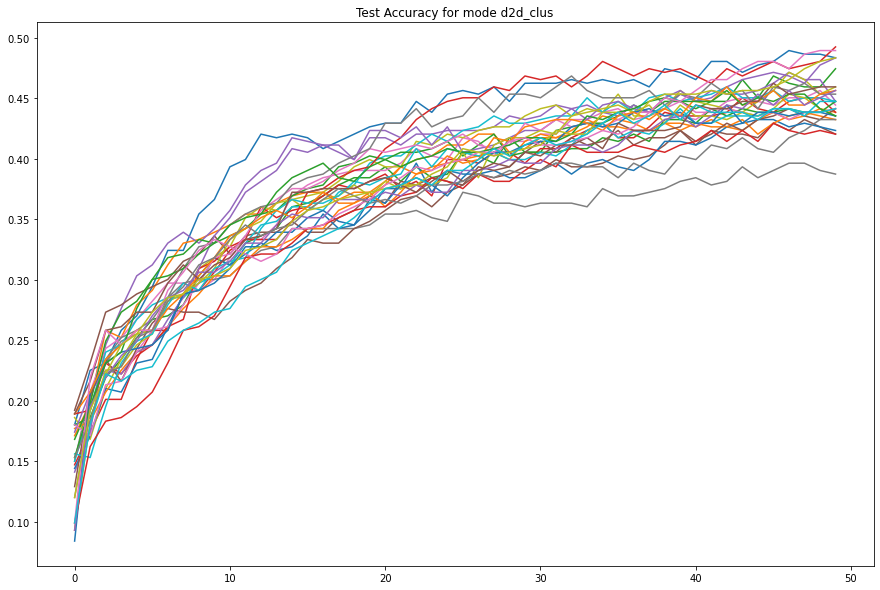

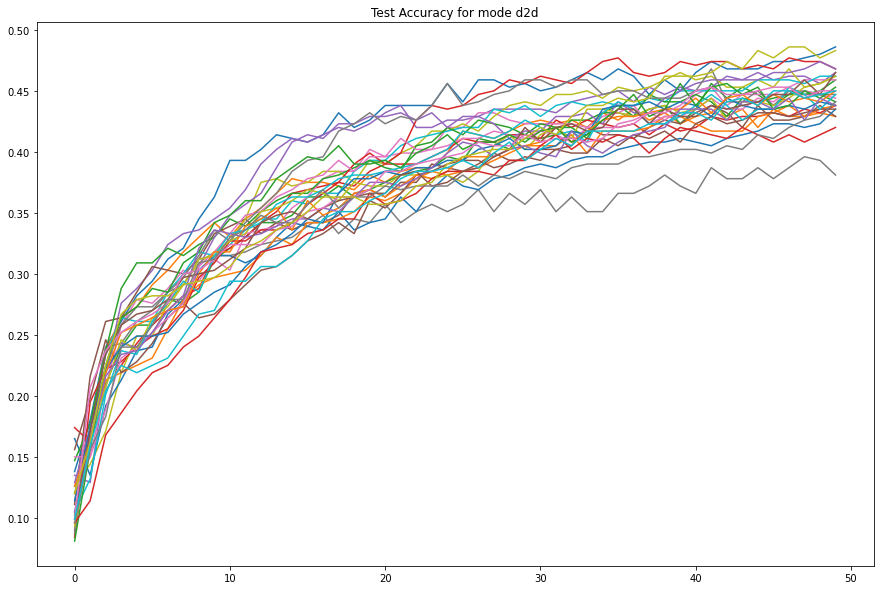

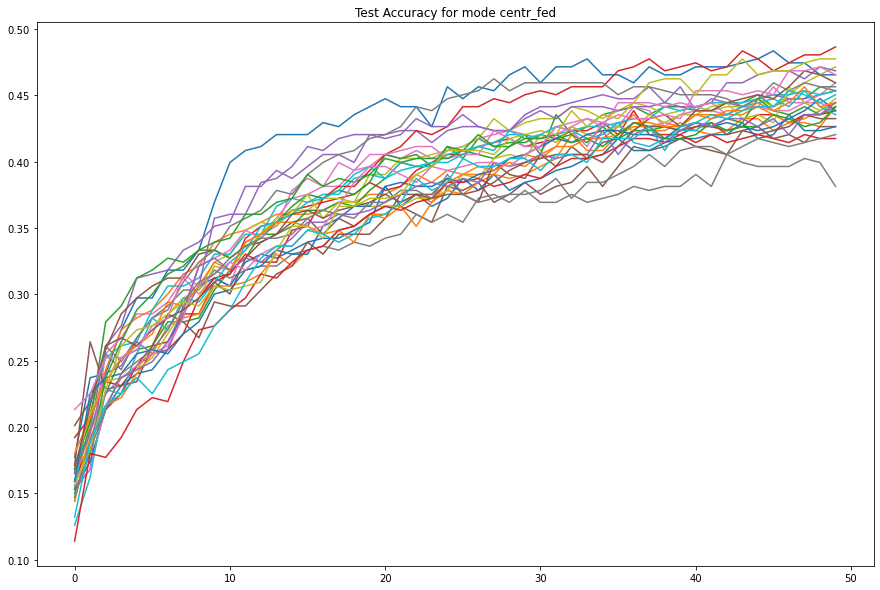

In [5]:
timestr = time.strftime("%Y%m%d-%H")
modes = trg_loss.keys()
for mode in modes:
    if mode != 'sgd':
        fig = plt.figure(figsize = (15,10))
        for node in final_nodes:
            plt.plot(test_acc[mode][node])
            plt.title('Test Accuracy for mode %s' %mode)
            plt.grid()
#         filename = './Results/Acc_Mode_' + dataset +'_'+  mode + '_'+ timestr
#         plt.savefig(filename)
             

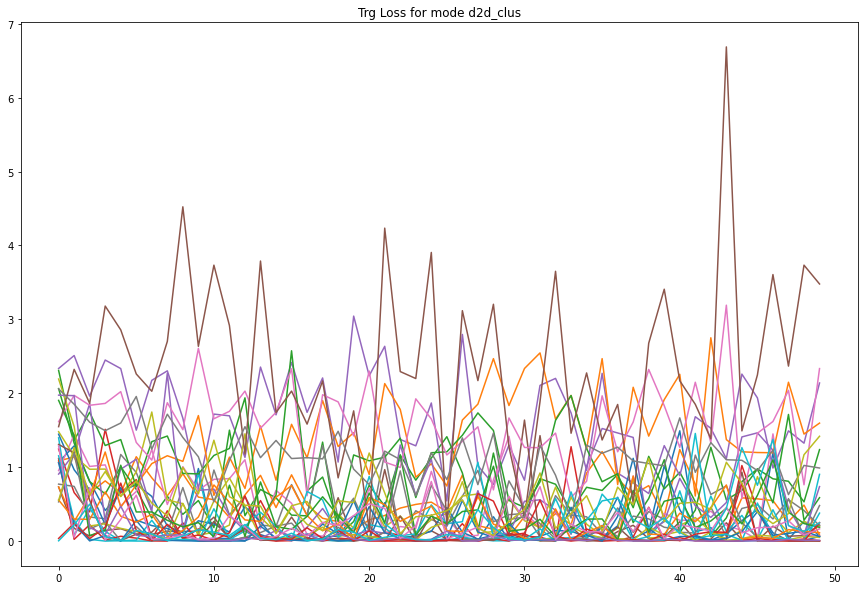

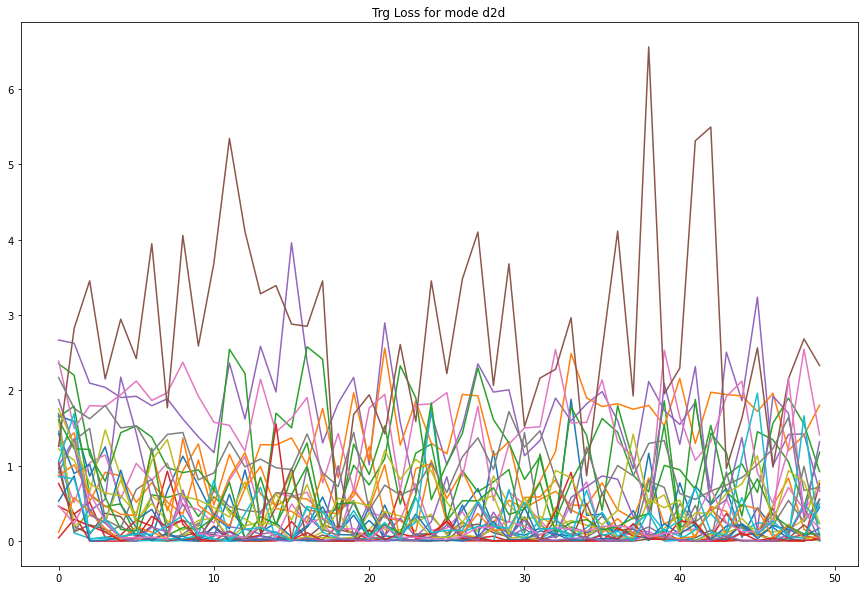

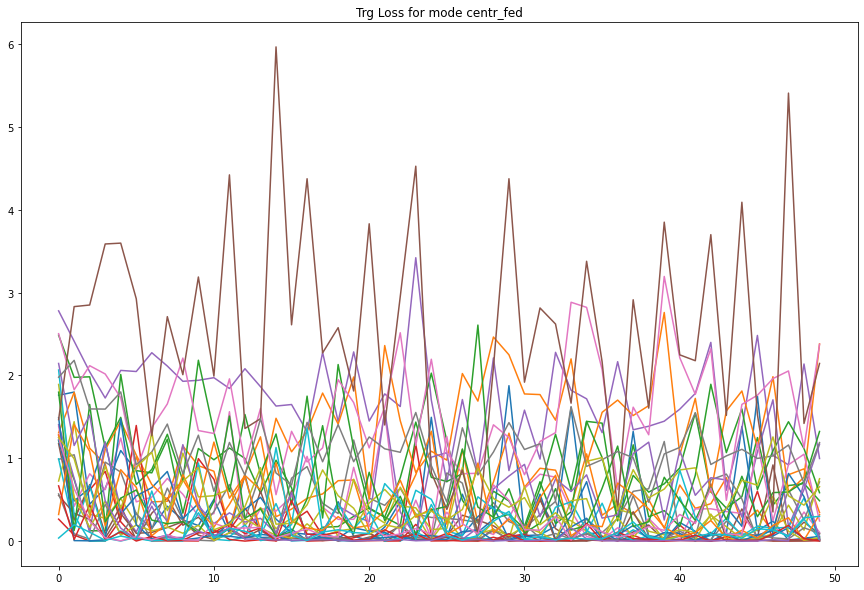

In [6]:
for mode in modes:
    if mode != 'sgd':
        fig = plt.figure(figsize = (15,10))
        for node in final_nodes:
            plt.plot(trg_loss[mode][node])
            plt.title('Trg Loss for mode %s' %mode)
            plt.grid()
#         filename = './Results/Loss_Mode_' + dataset +'_'+  mode + '_'+ timestr
#         plt.savefig(filename)

<ipython-input-12-300b7a40bbef>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize = (5, 10))


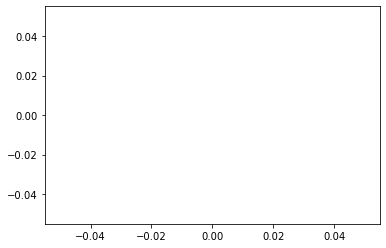

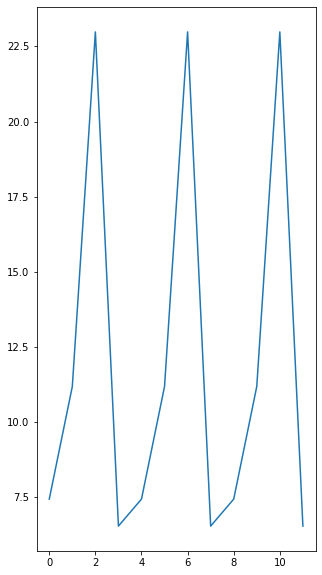

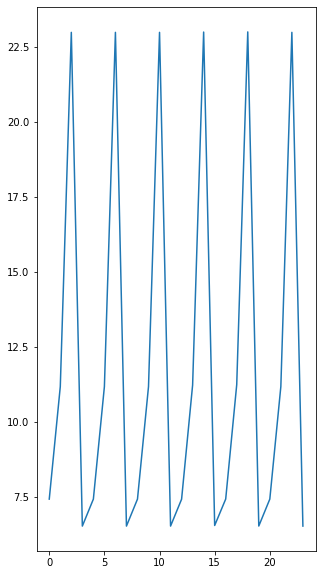

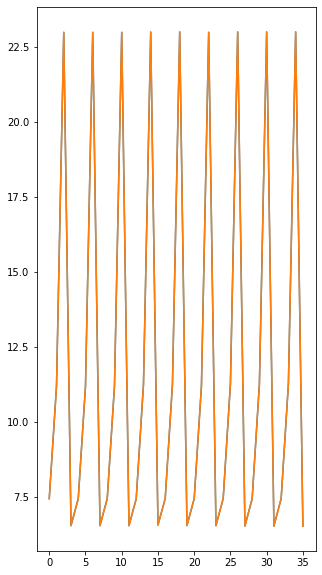

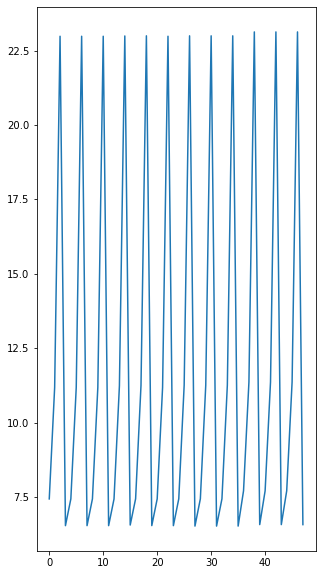

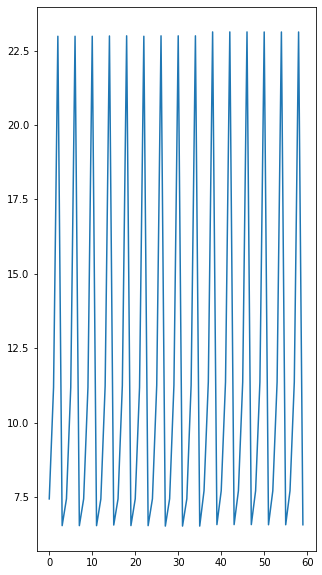

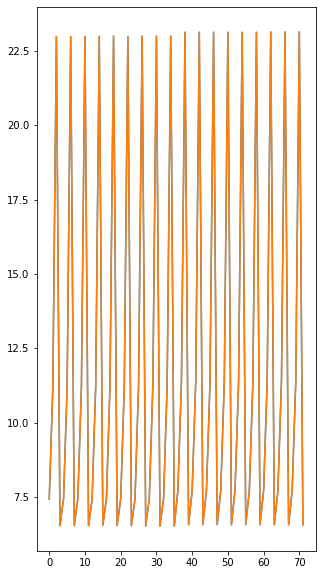

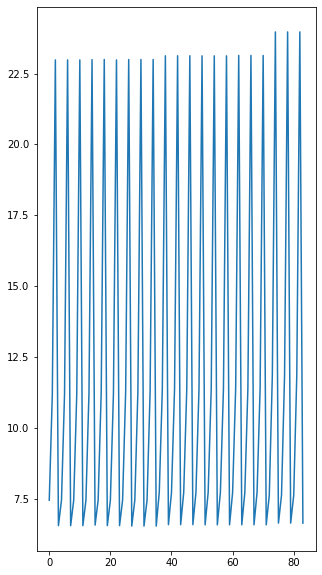

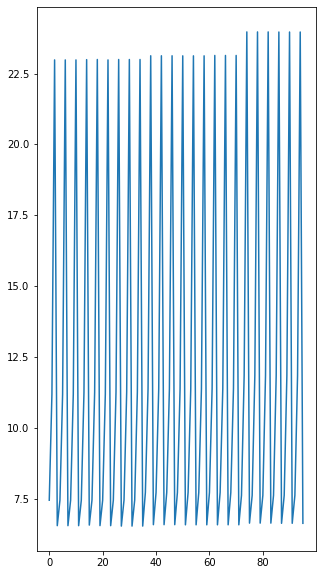

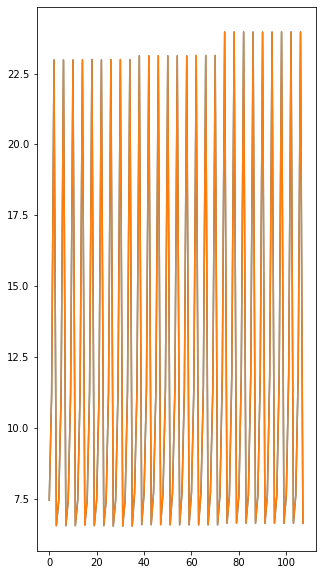

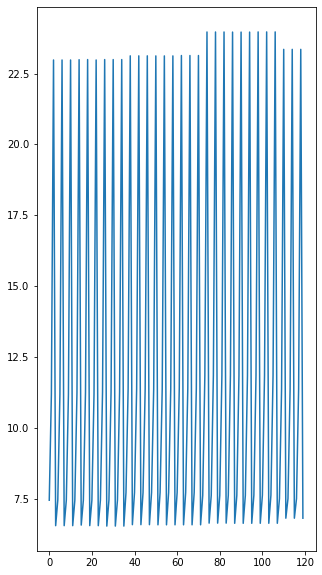

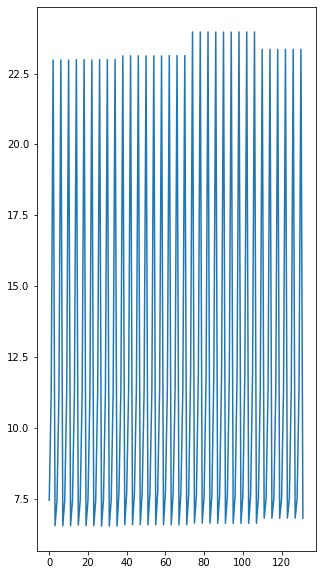

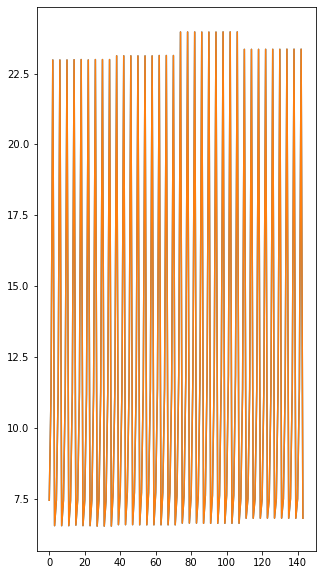

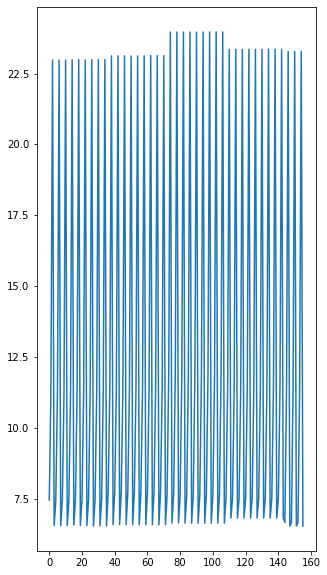

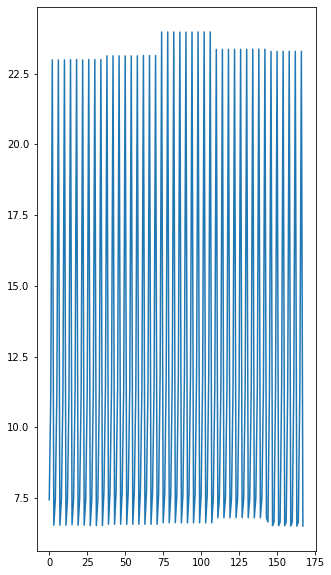

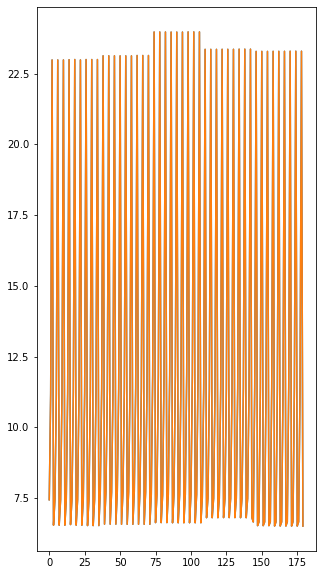

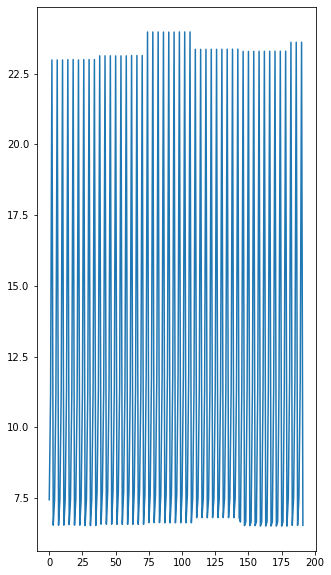

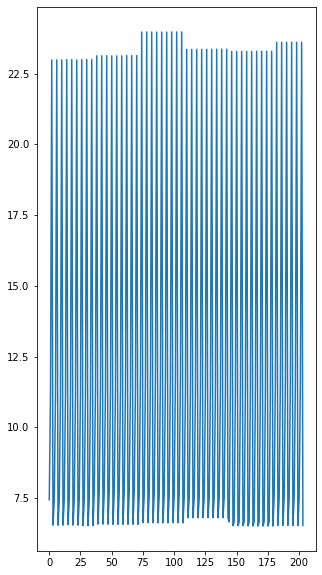

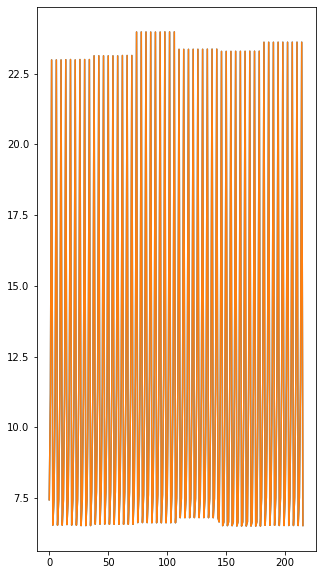

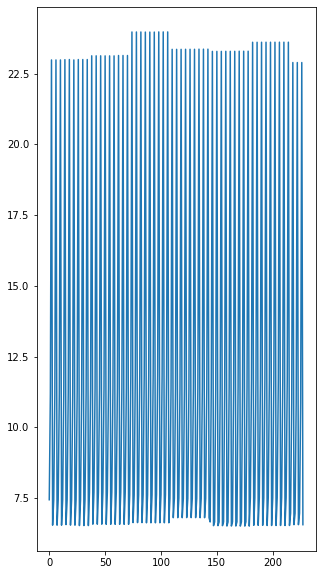

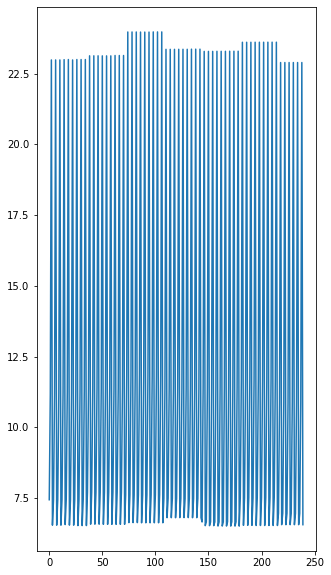

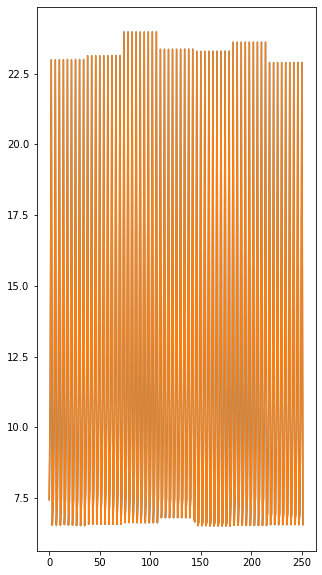

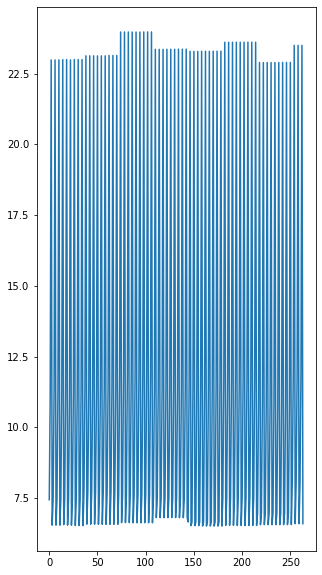

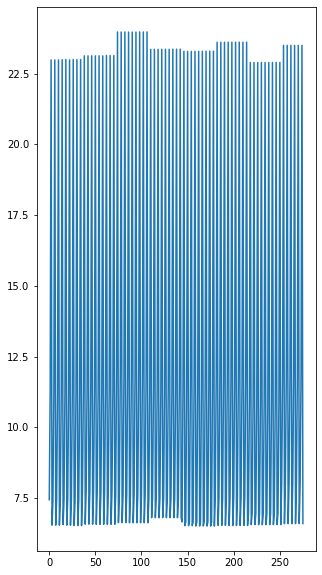

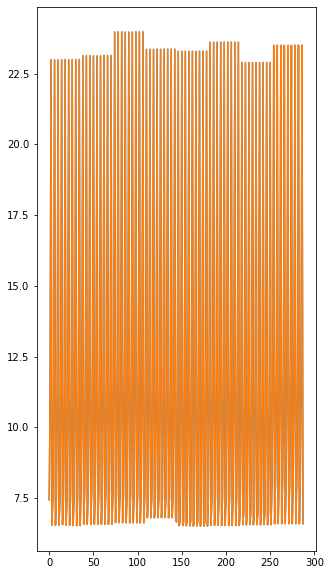

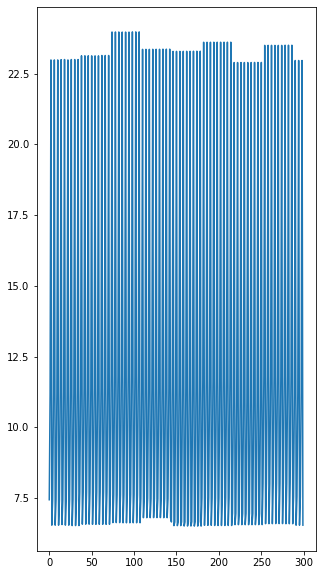

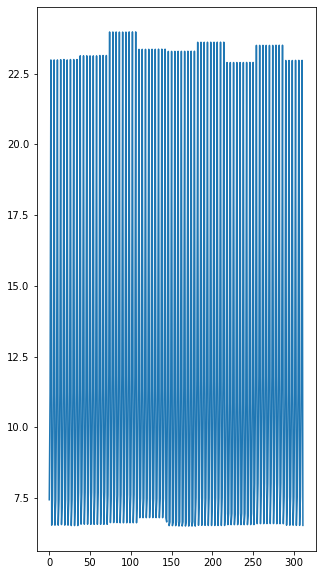

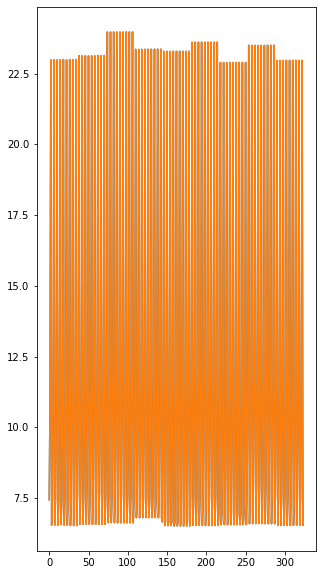

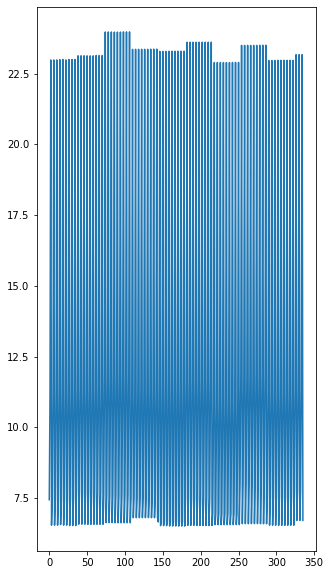

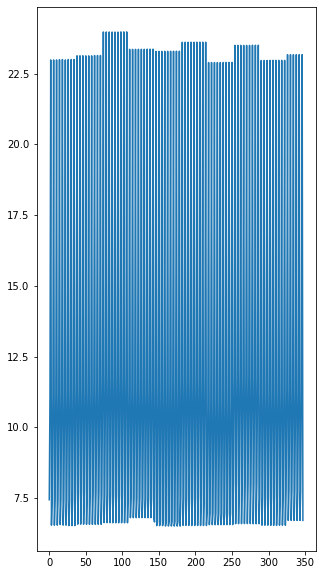

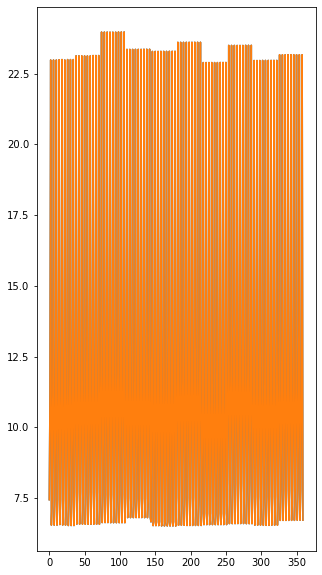

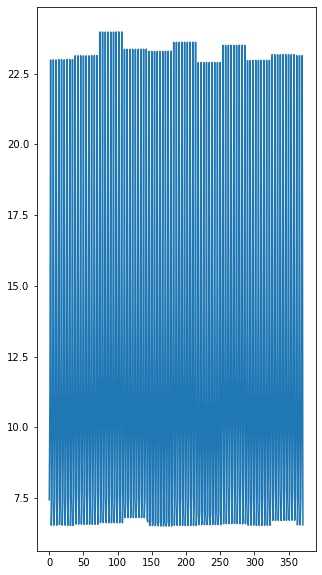

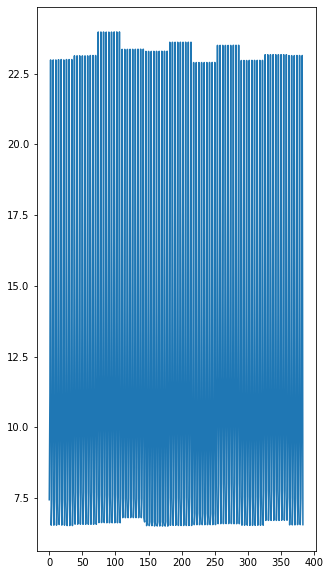

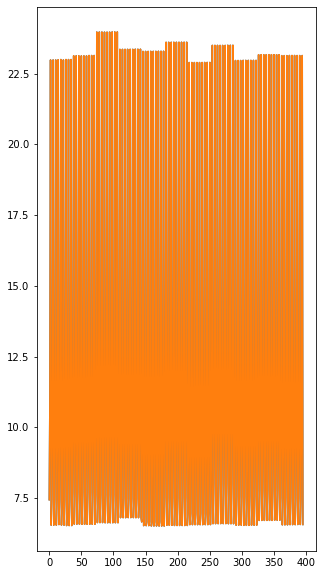

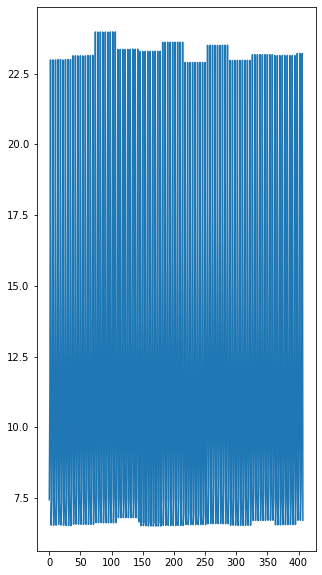

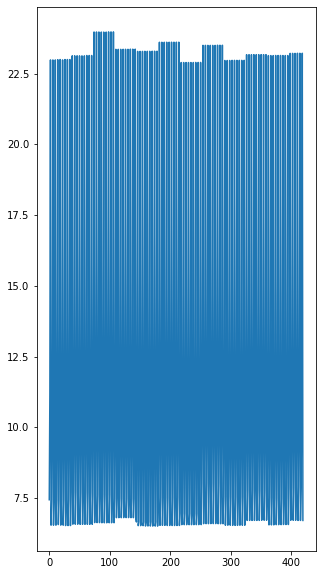

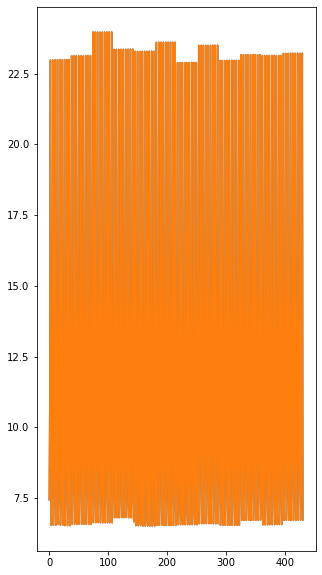

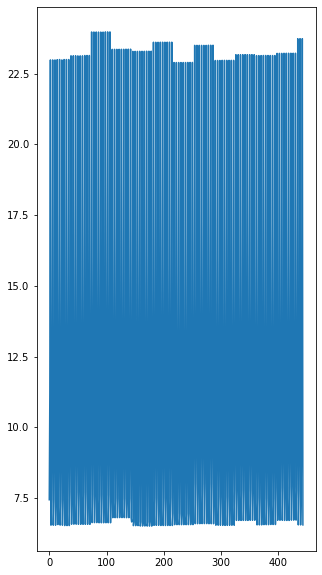

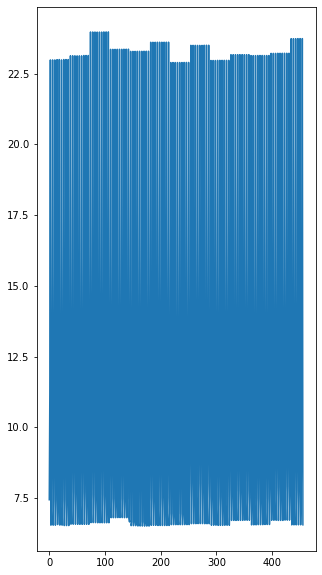

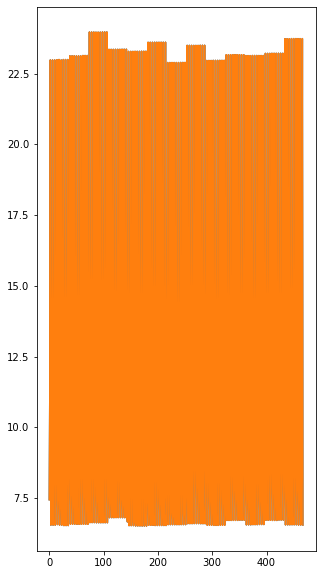

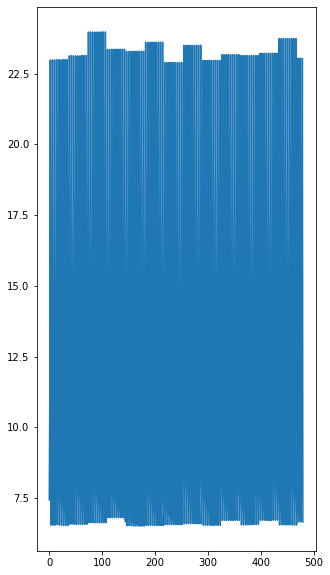

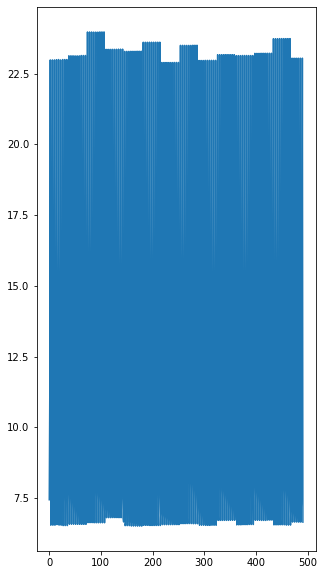

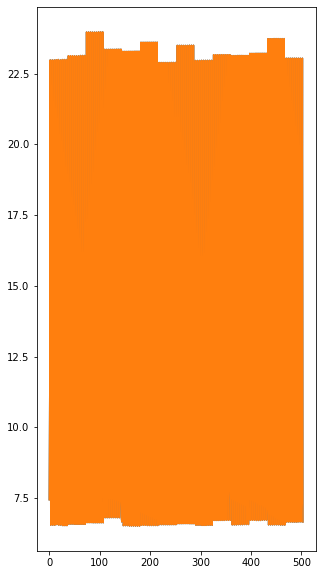

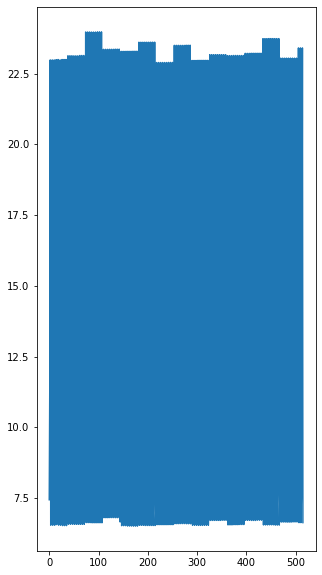

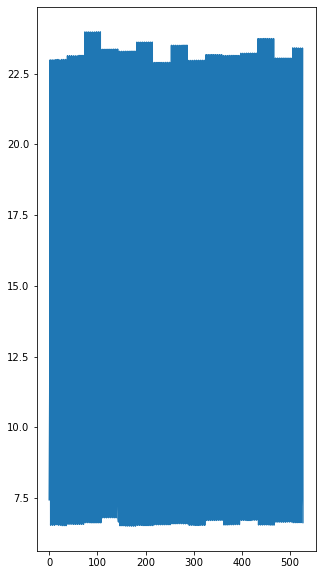

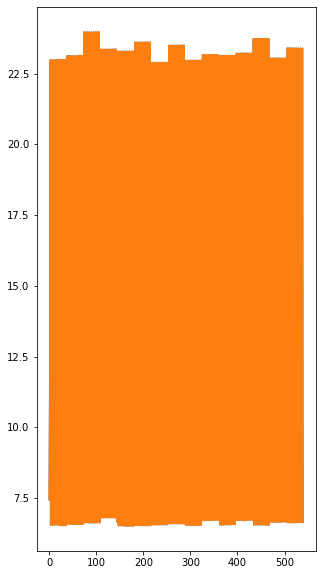

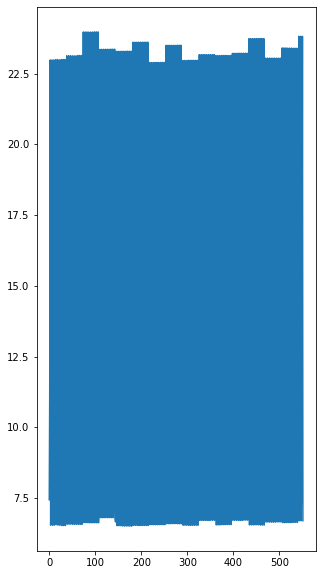

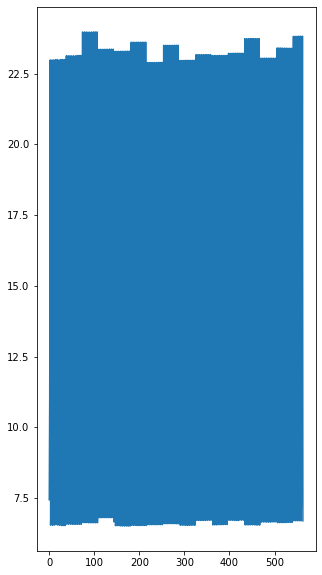

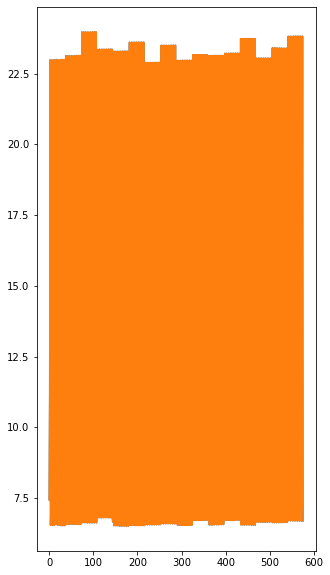

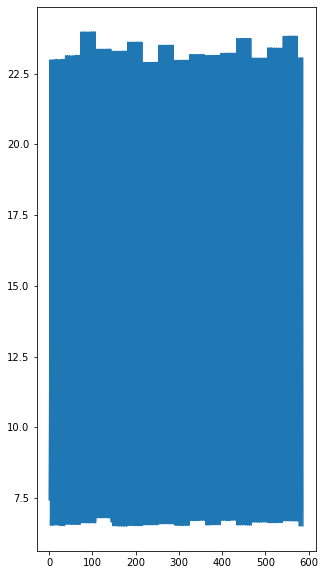

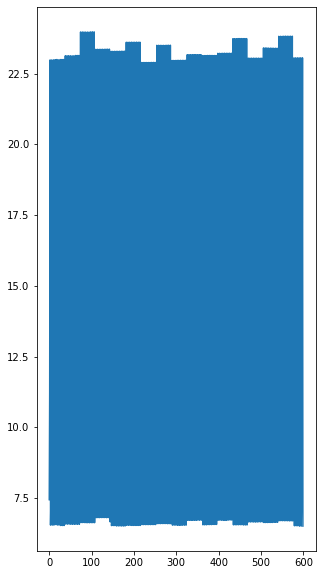

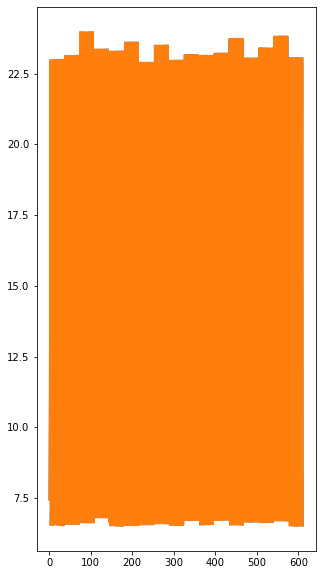

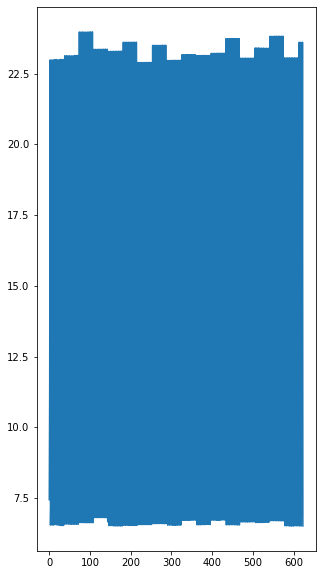

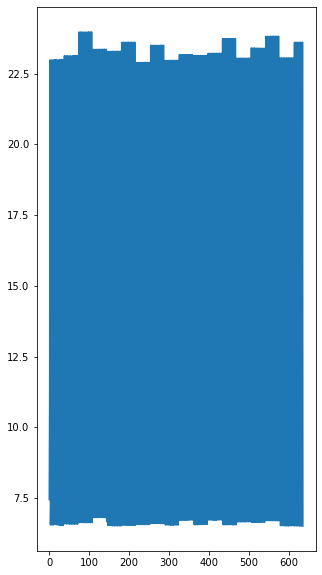

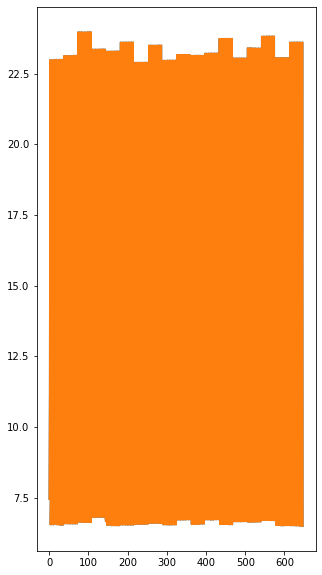

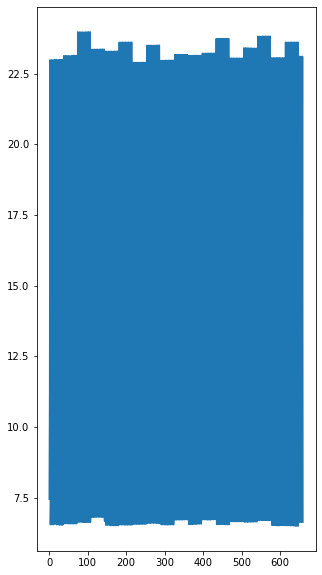

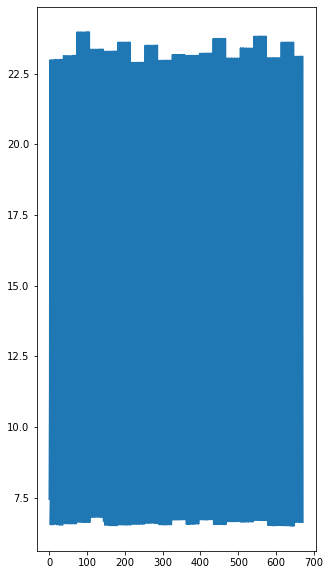

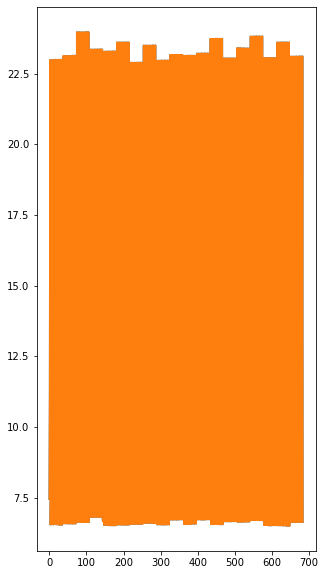

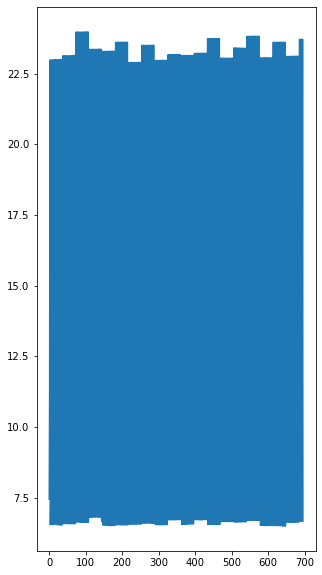

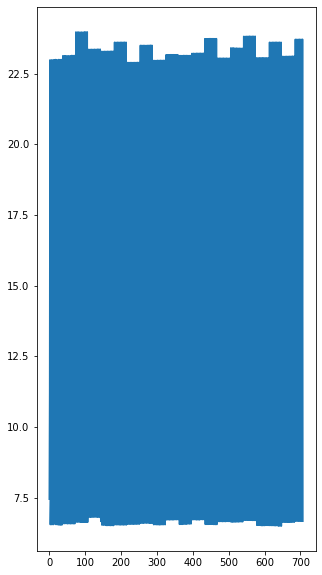

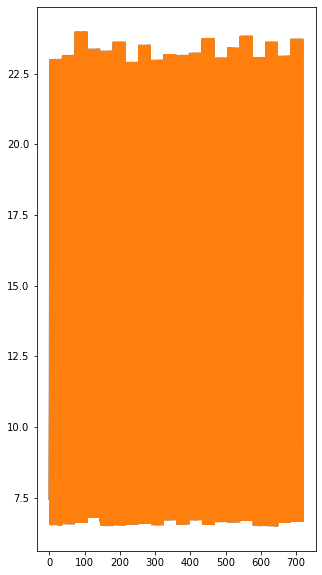

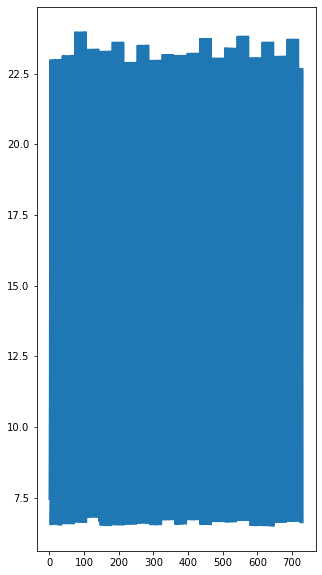

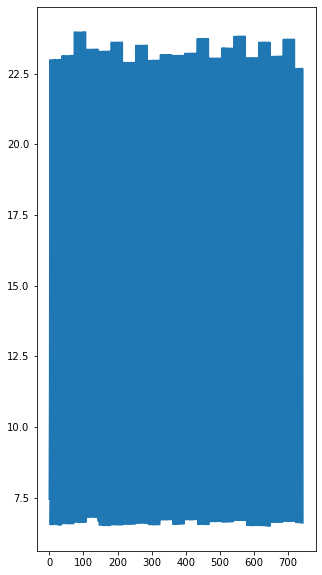

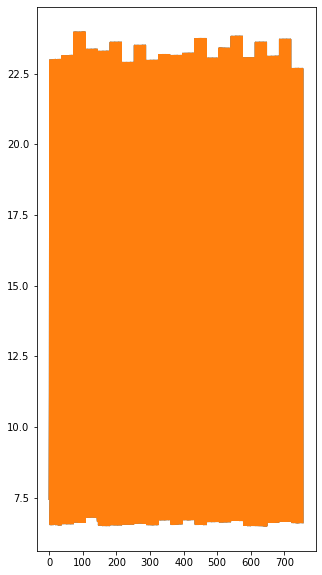

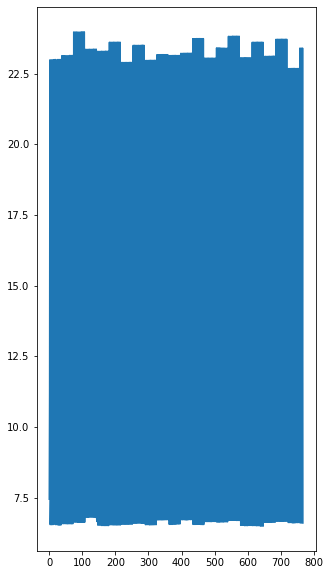

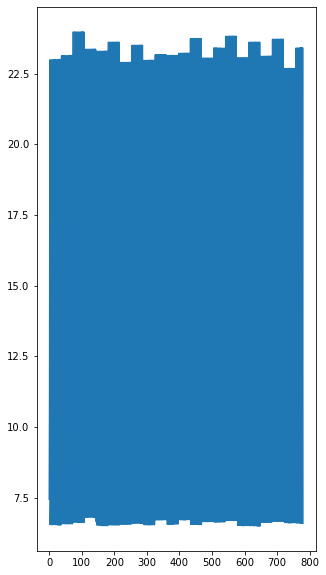

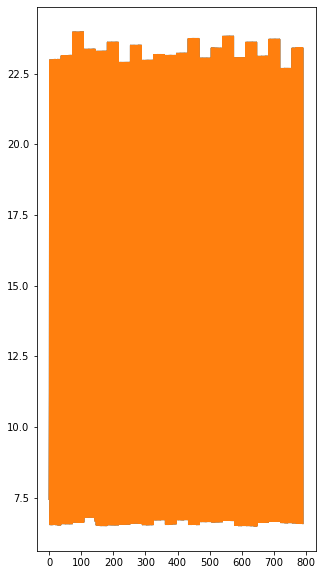

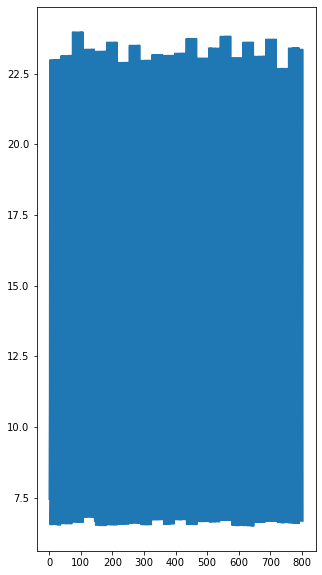

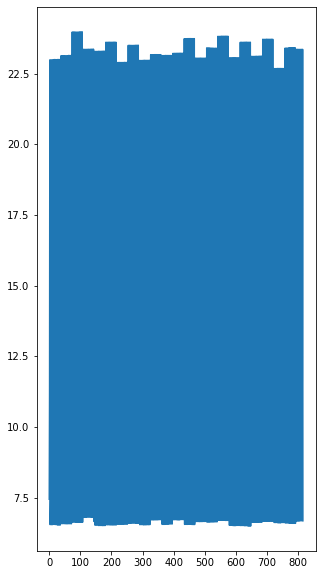

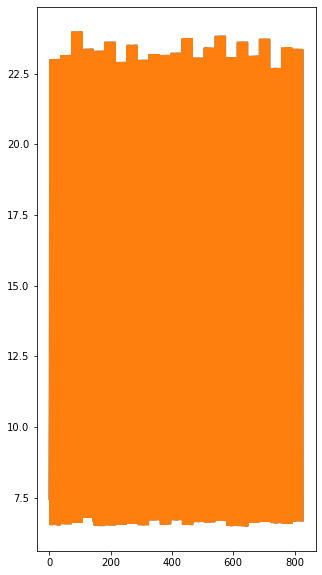

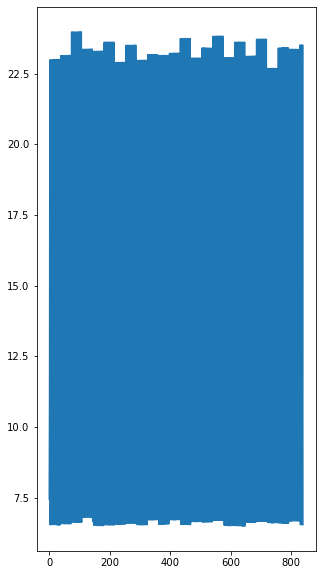

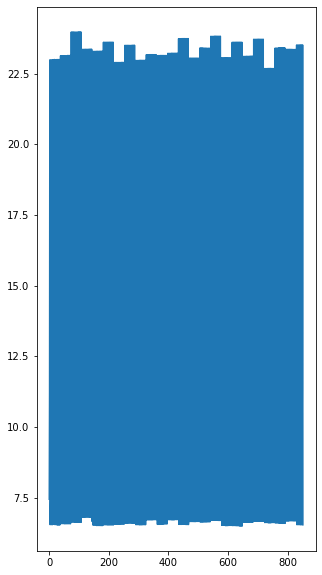

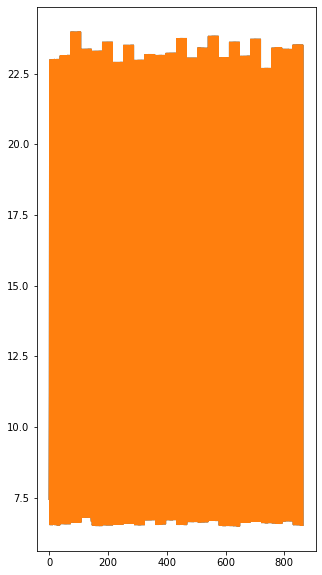

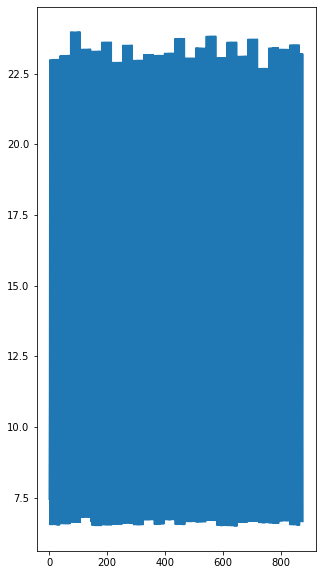

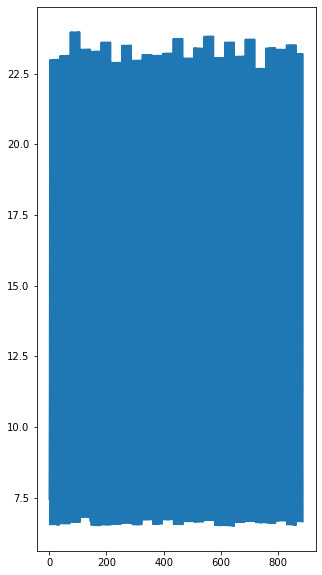

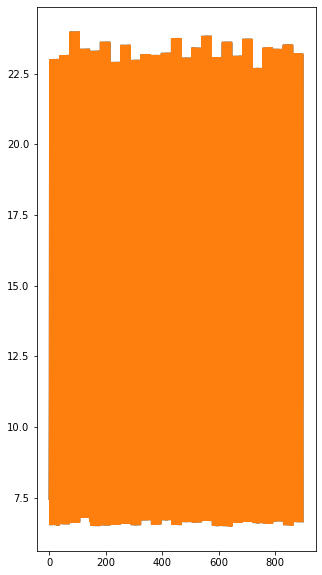

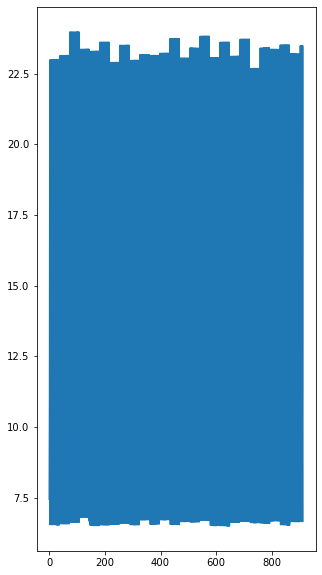

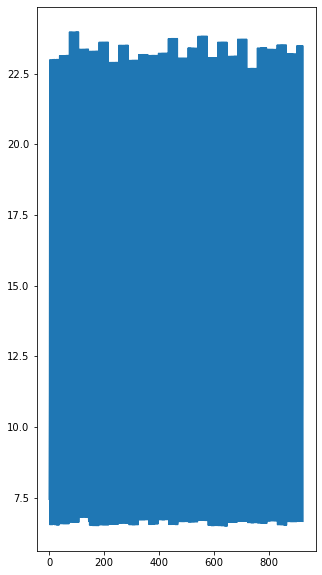

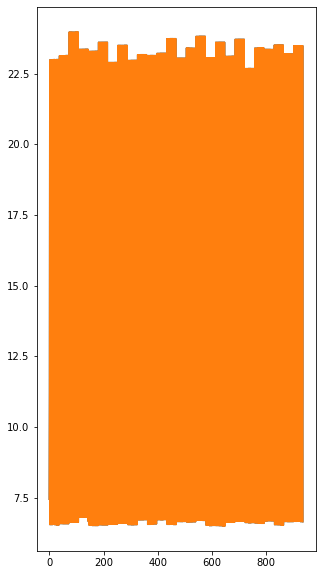

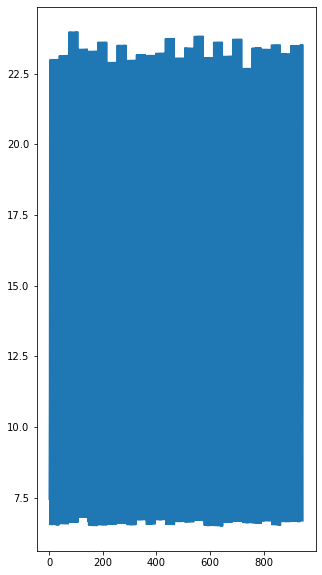

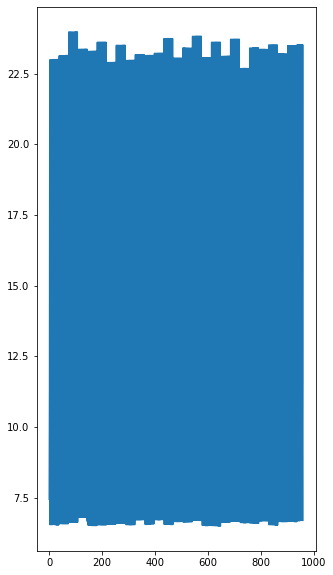

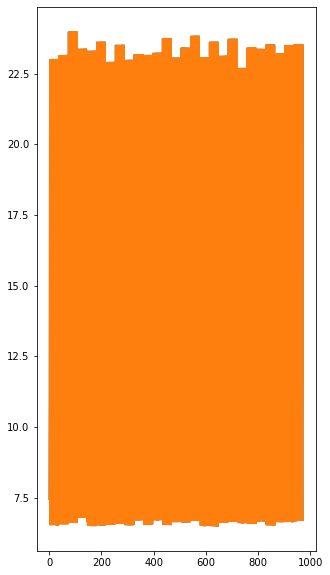

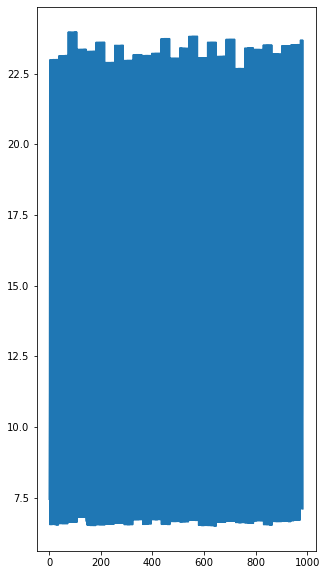

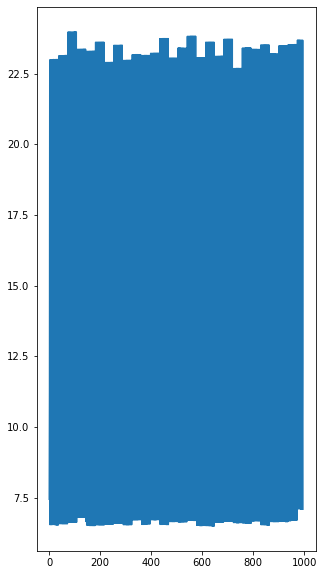

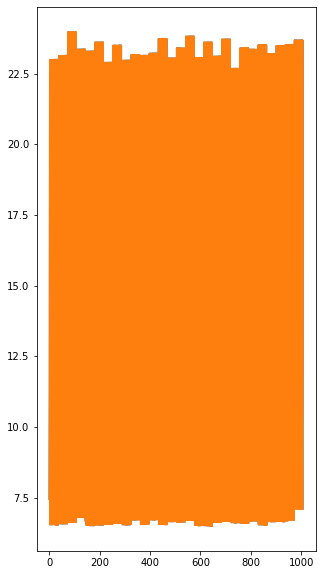

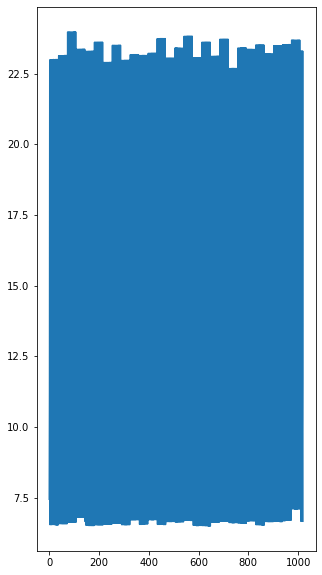

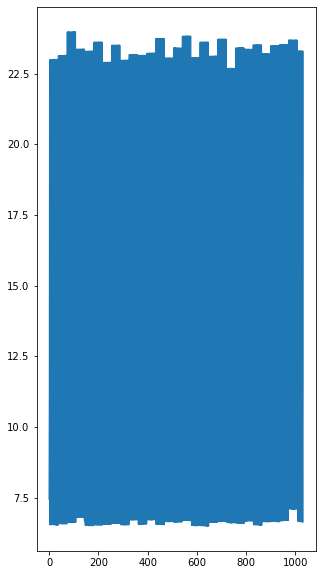

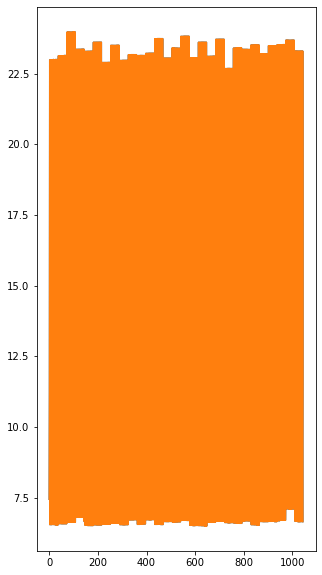

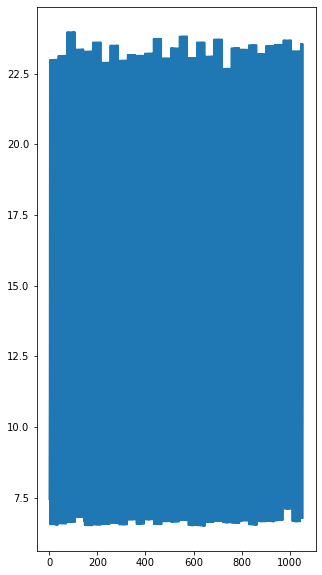

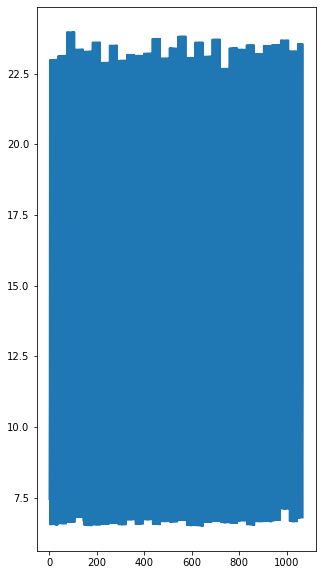

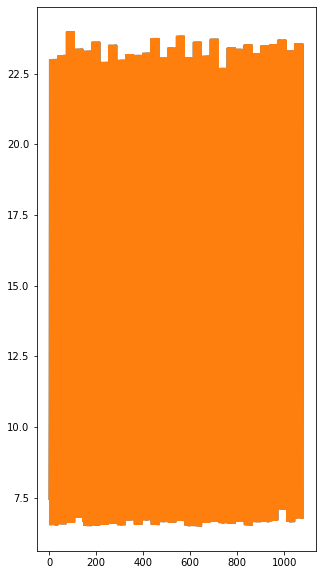

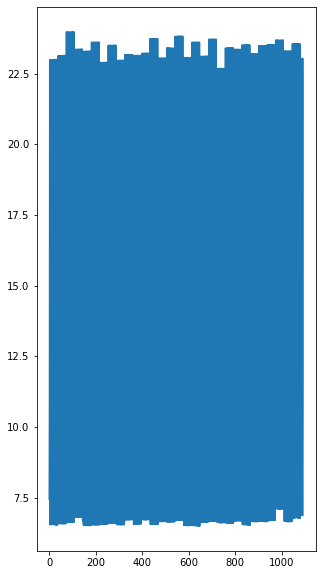

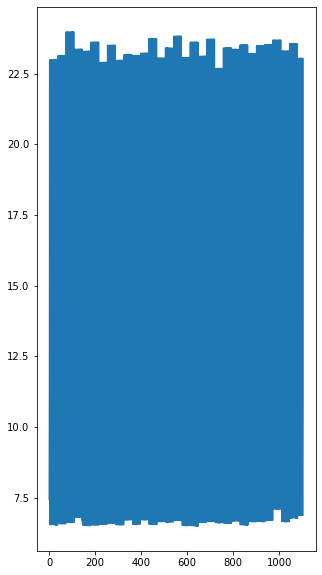

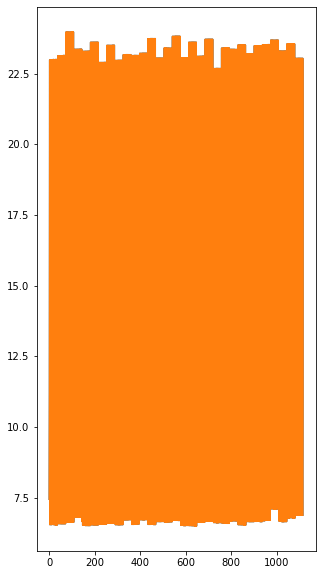

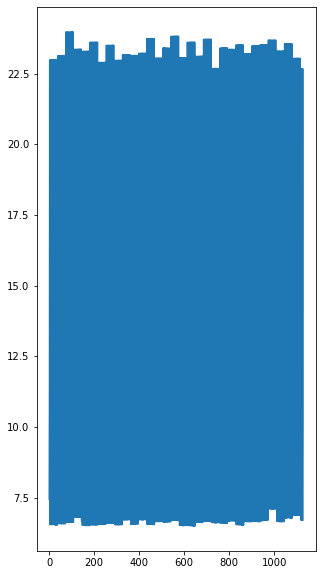

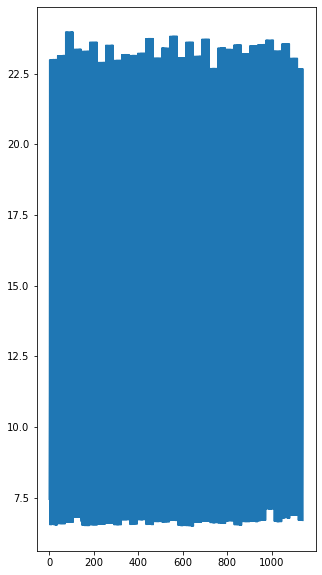

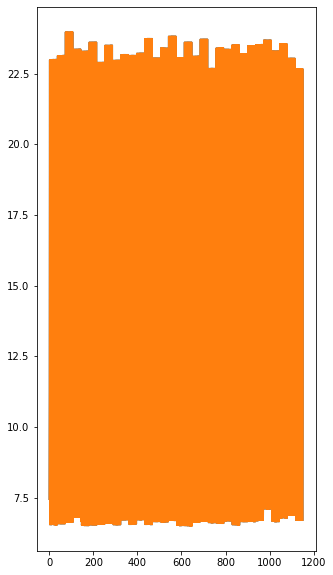

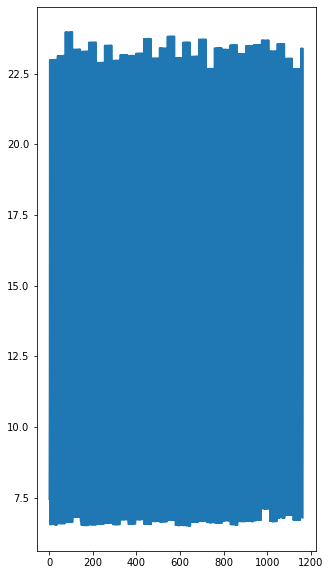

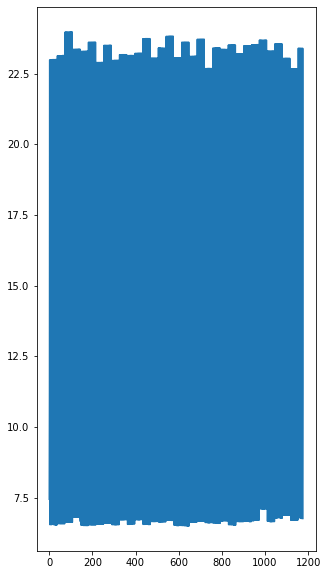

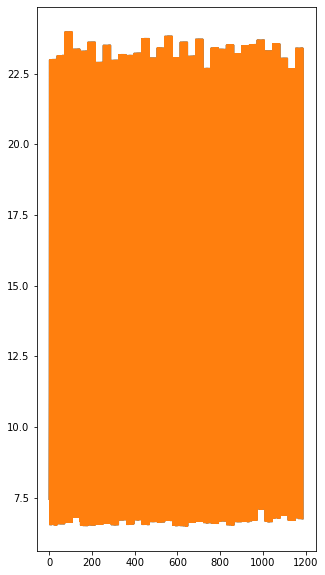

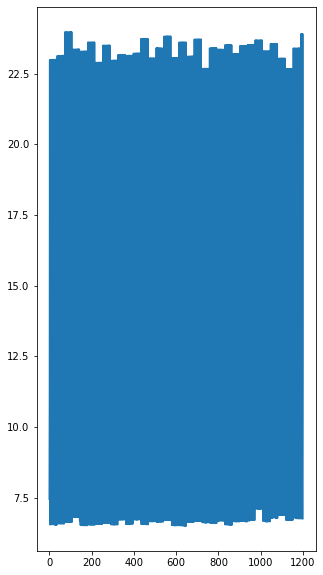

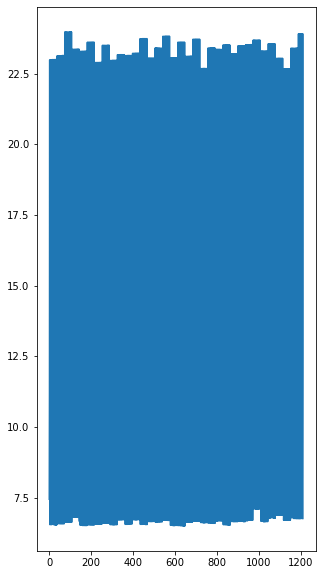

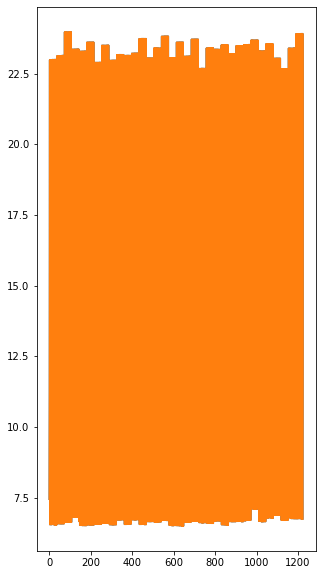

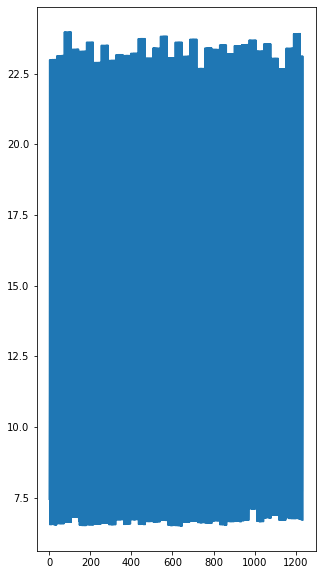

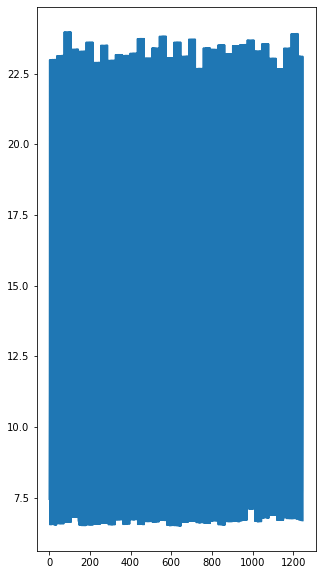

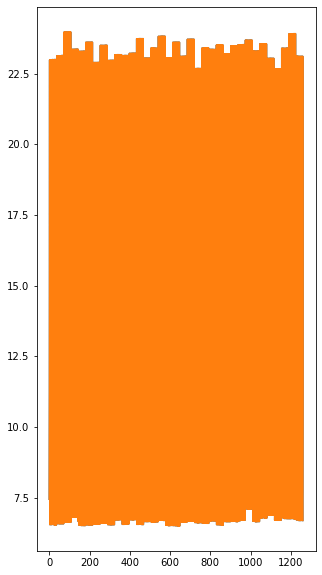

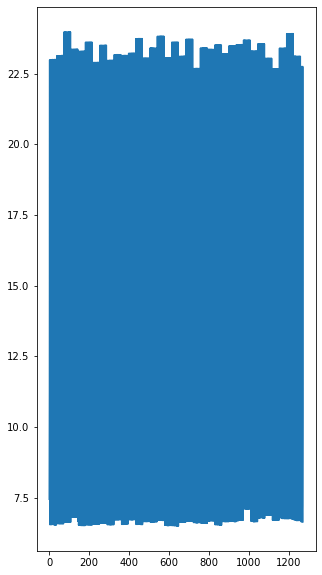

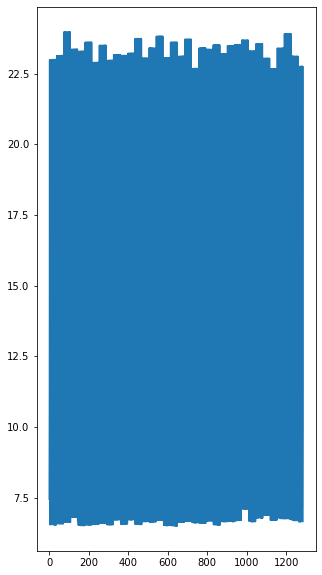

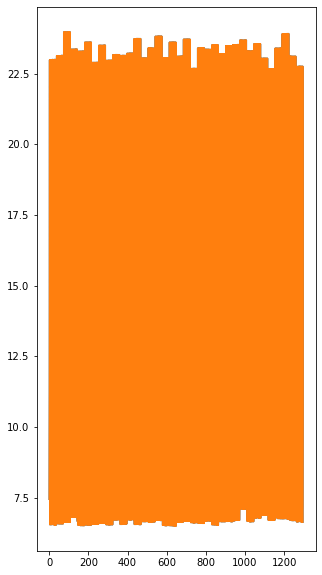

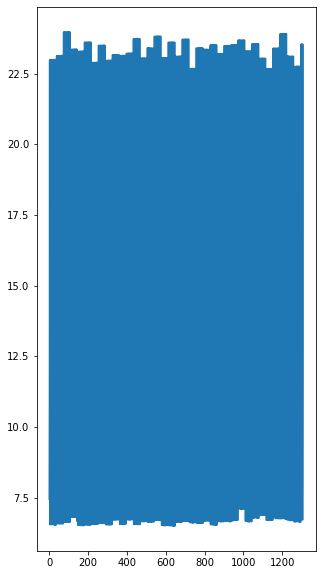

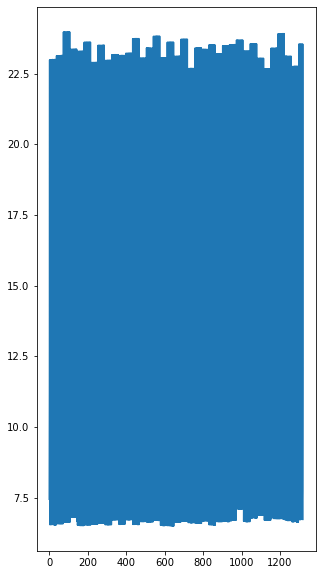

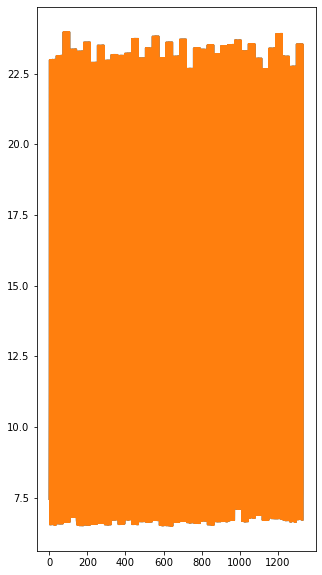

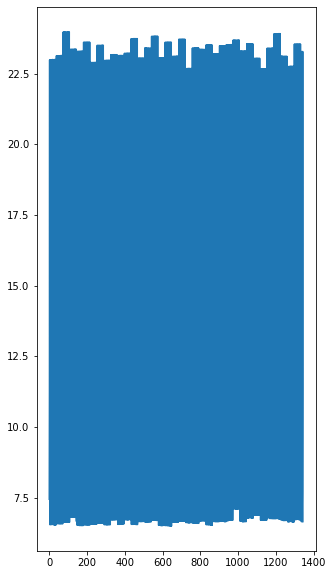

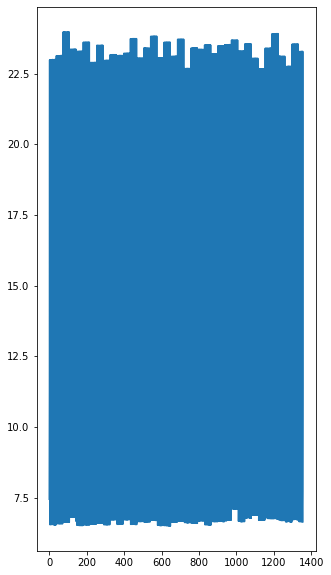

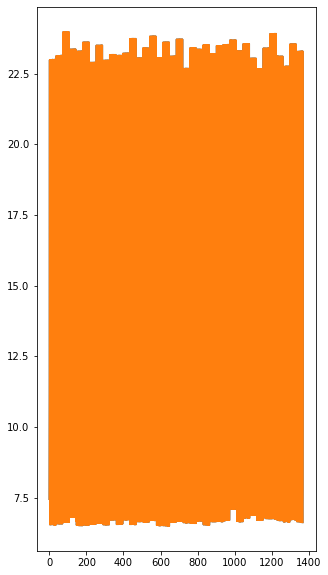

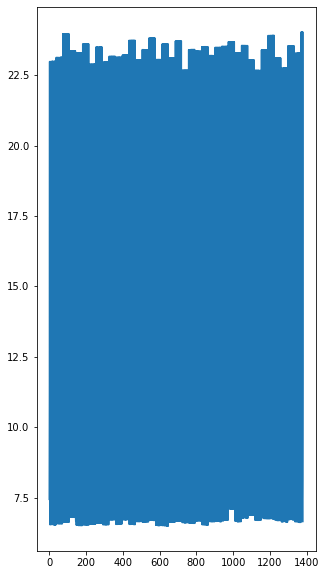

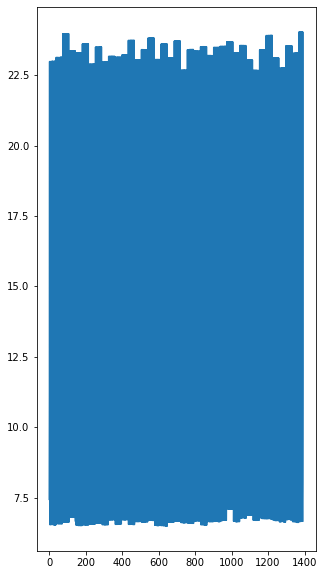

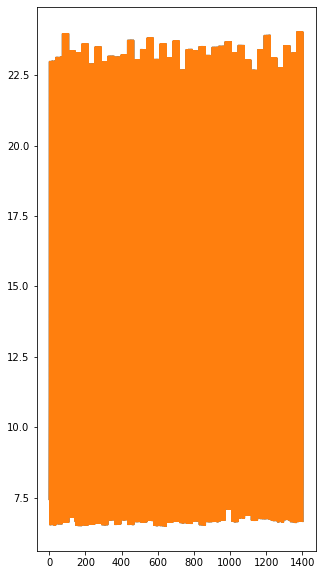

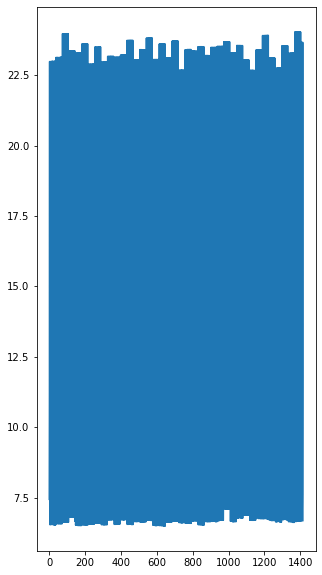

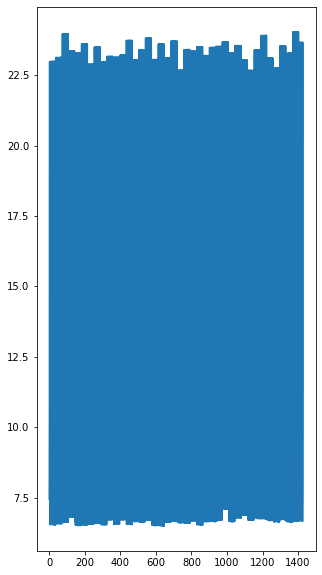

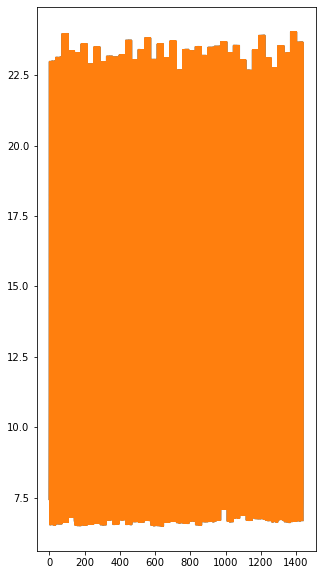

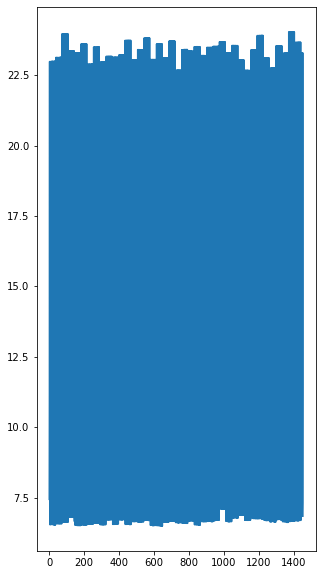

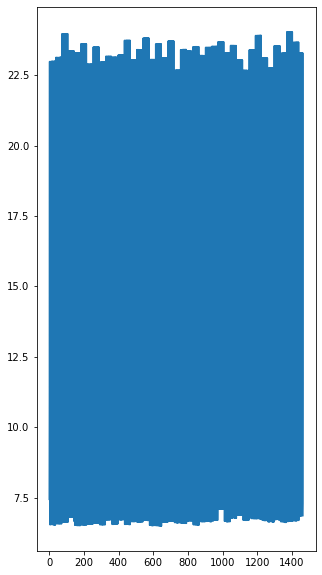

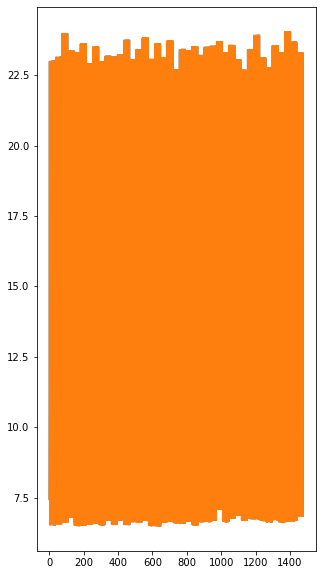

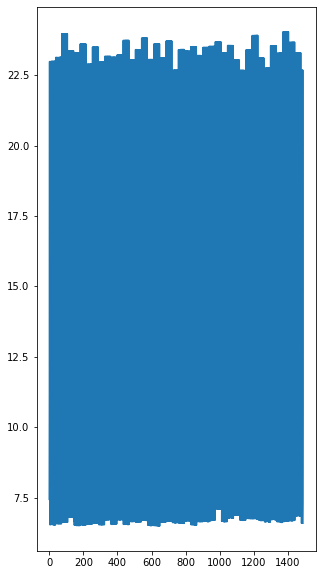

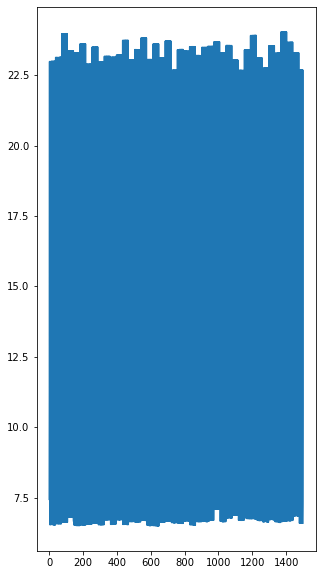

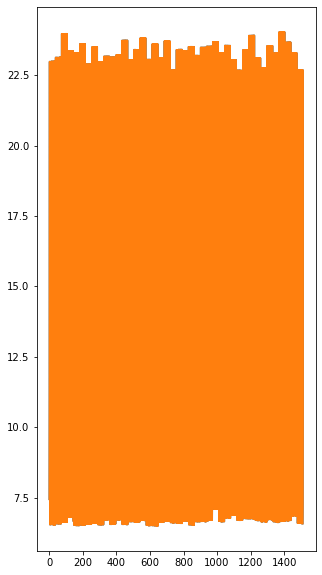

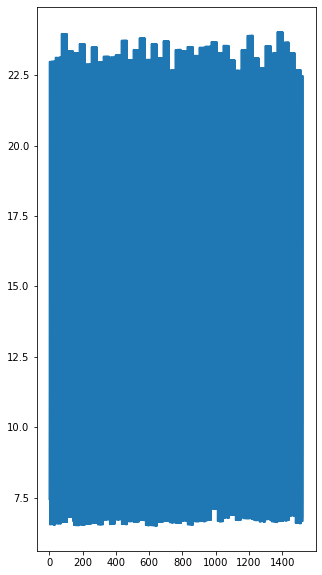

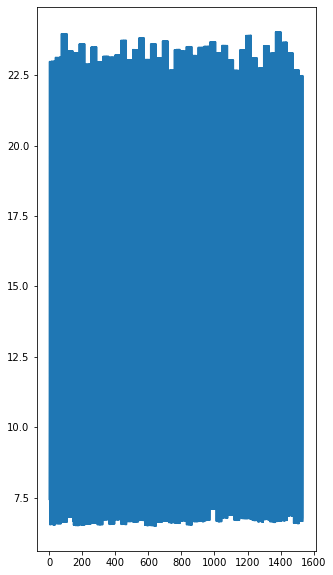

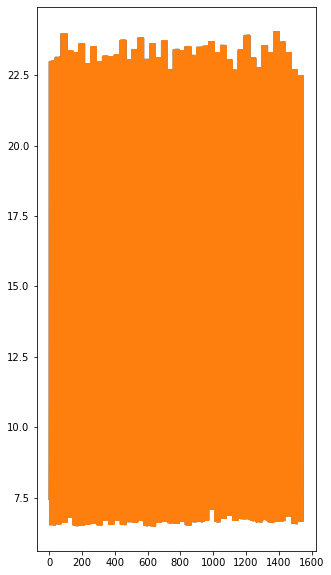

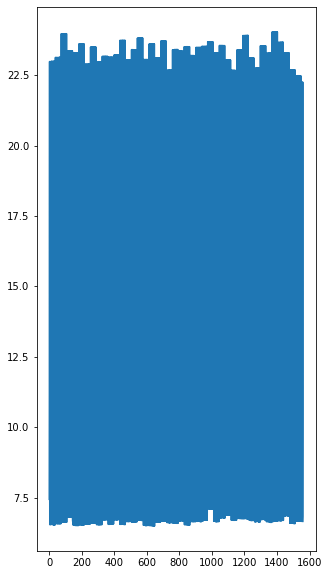

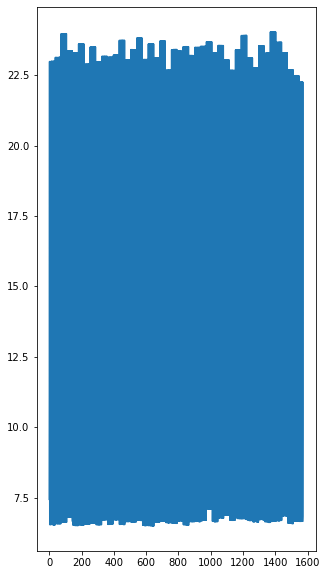

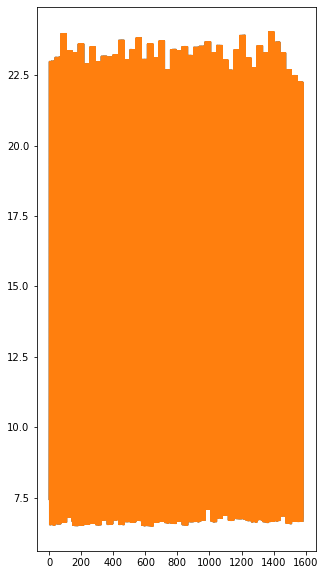

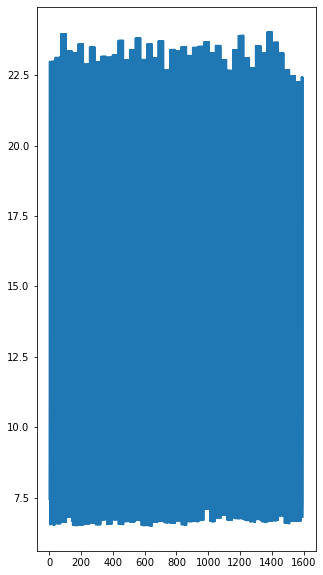

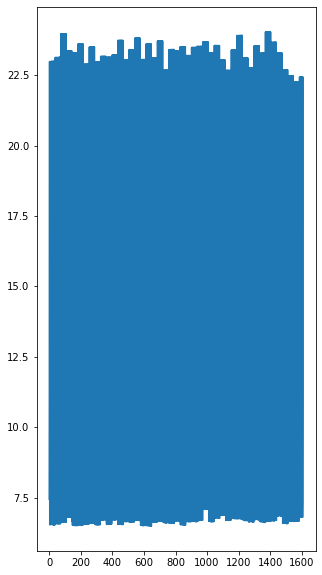

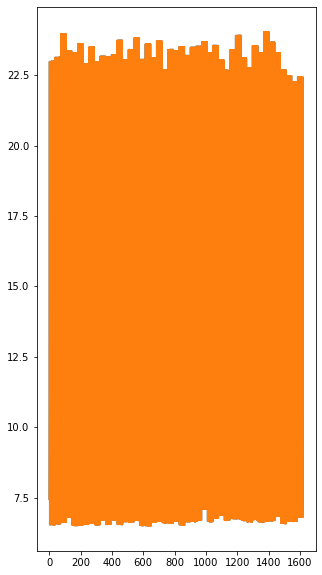

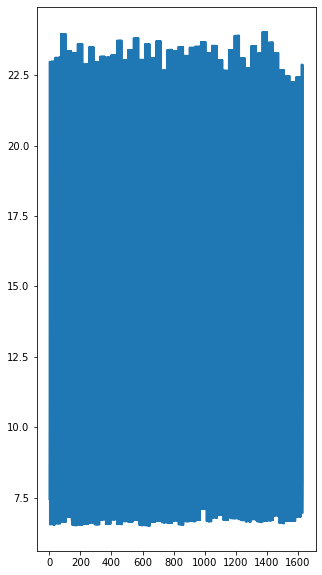

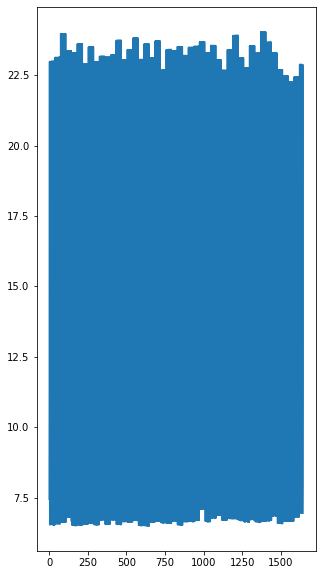

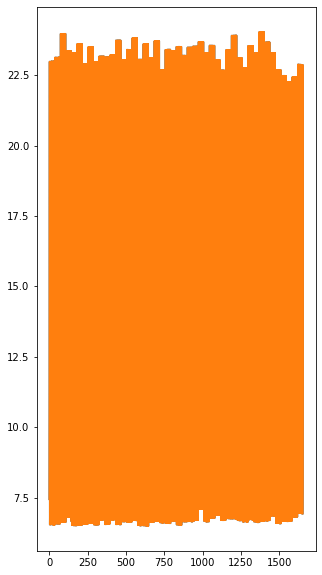

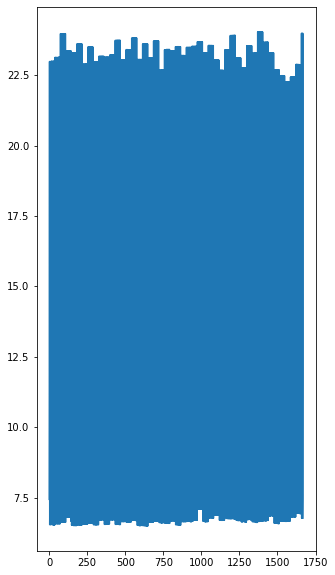

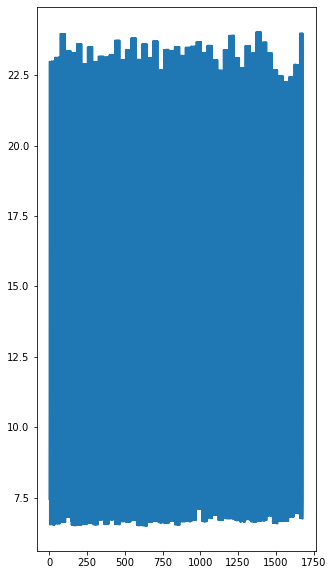

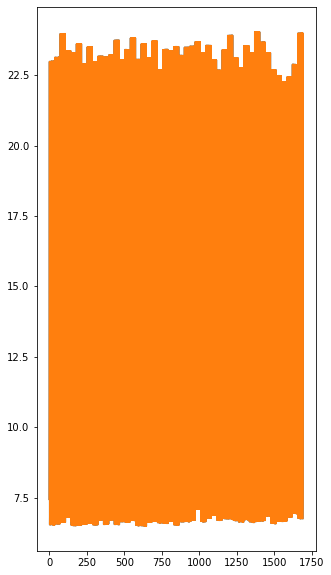

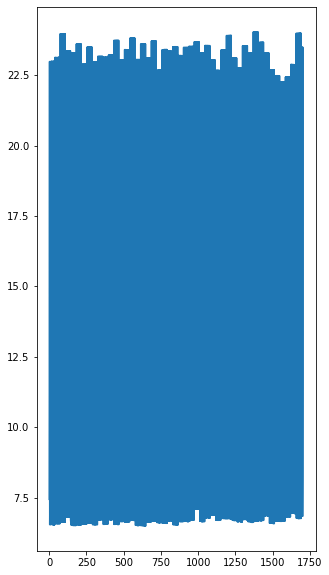

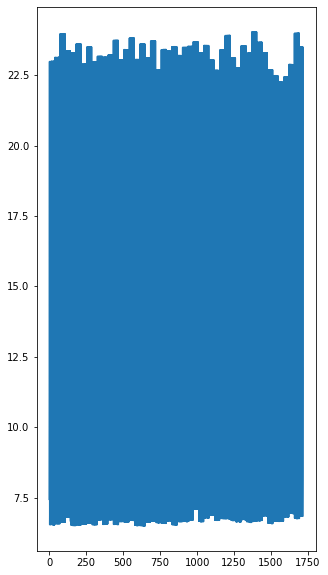

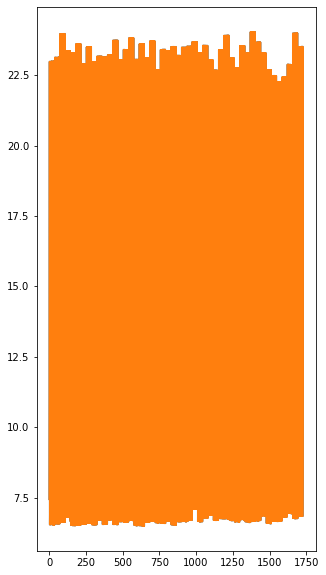

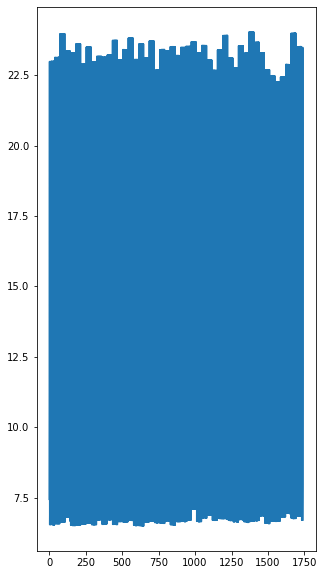

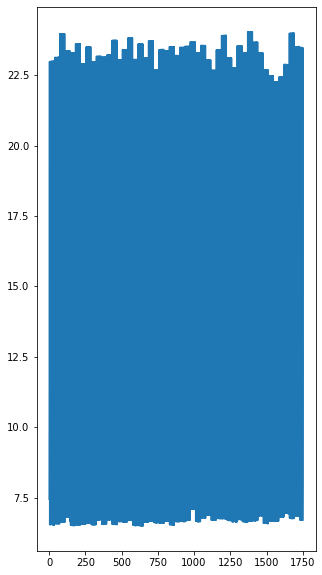

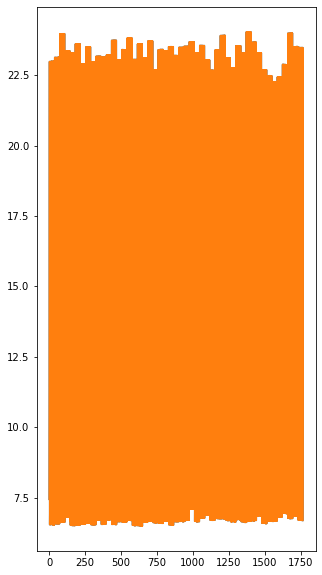

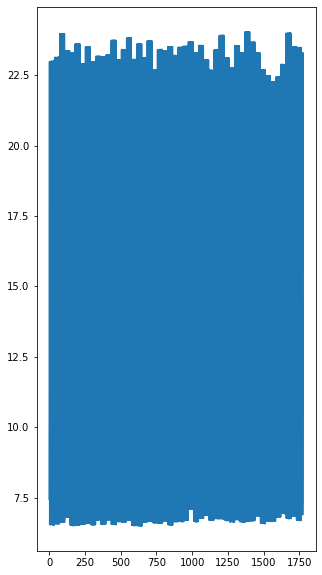

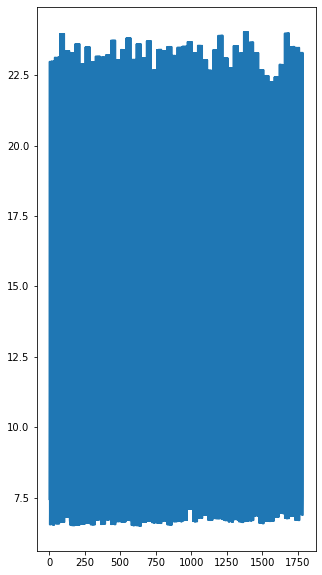

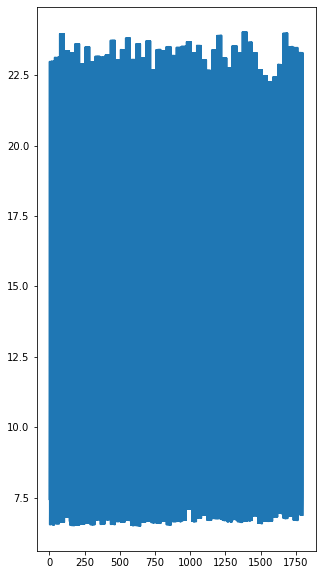

In [12]:
divergence = []
for round in range(len(divergece_dict)):
    for mode in modes:
        if mode != 'sgd':
            fig = plt.figure(figsize = (5, 10))
            for div_metric in divergece_dict[round][mode]:
                divergence.append(div_metric.item())
        plt.plot(divergence)

In [18]:
timestr = time.strftime("%Y%m%d-%H")
filename = './Results/results'  + dataset +'_'+  mode + '_'+ timestr
results = [test_acc, trg_loss, divergece_dict]
f = open(filename, 'wb')
pickle.dump(results, f)